In [65]:
from subgrounds import Subgrounds
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [66]:
API_KEY = "6b4801789dca4e33fb0b7a051d93c910"
# SUBGRAPH_API_URL = f"https://gateway-arbitrum.network.thegraph.com/api/{API_KEY}/subgraphs/id/5nwMCSHaTqG3Kd2gHznbTXEnZ9QNWsssQfbHhDqQSQFp" # Mainnet
# SUBGRAPH_API_URL = f"https://gateway-arbitrum.network.thegraph.com/api/{API_KEY}/subgraphs/id/Ff7ha9ELmpmg81D6nYxy4t8aGP26dPztqD1LDJNPqjLS" # Arbitrum
SUBGRAPH_API_URL = f"https://gateway-arbitrum.network.thegraph.com/api/{API_KEY}/subgraphs/id/AaFtUWKfFdj2x8nnE3RxTSJkHwGHvawH3VWFBykCGzLs" # Polygon
# SUBGRAPH_API_URL = f"https://gateway-arbitrum.network.thegraph.com/api/3c7289adb32c9812d26737bb611e4f73/subgraphs/id/2hcXhs36pTBDVUmk5K2Zkr6N4UYGwaHuco2a6jyTsijo" # Base


sg = Subgrounds()

comp_v3 = sg.load_subgraph(SUBGRAPH_API_URL)

print(date.today())


/Users/spencerperkins/Developer/Environments/default/lib/python3.10/site-packages/subgrounds/subgraph/fieldpath.py:612: ResourceWarning: unclosed <ssl.SSLSocket fd=77, family=AddressFamily.AF_INET6, type=SocketKind.SOCK_STREAM, proto=0, laddr=('2600:1700:7be1:630:5131:c637:7de9:2b33', 54202, 0, 0), raddr=('2606:4700:4400::ac40:93e1', 443, 0, 0)>
  match super().__getattribute__(__name):


2023-12-22


In [67]:
# Protocol Current

protocols = comp_v3.Query.protocols()

overview_df = sg.query_df([protocols])
print("Overview")
display(overview_df.T)

markets_df = sg.query_df([protocols.markets])
print("Market Proxy Addresses")
display(markets_df)

accounting_df = sg.query_df([protocols.accounting])
print("Accounting")
display(accounting_df.T)

usage_df = sg.query_df([protocols.cumulativeUsage])
print("Usage")
display(usage_df.T)


Overview


,0
protocols_id,0x83e0f742cacbe66349e3701b171ee2487a26e738
protocols_configuratorProxy,0x83e0f742cacbe66349e3701b171ee2487a26e738
protocols_configuratorImplementation,0x9c4ec768c28520b50860ea7a15bd7213a9ff58bf
protocols_accounting_id,0x83e0f742cacbe66349e3701b171ee2487a26e738
protocols_cumulativeUsage_id,0x50524f544f434f4c5f43554d554c4154495645


Market Proxy Addresses


,protocols_markets_id,protocols_markets_cometProxy,protocols_markets_protocol_id,protocols_markets_creationBlockNumber,protocols_markets_configuration_id,protocols_markets_accounting_id,protocols_markets_cumulativeUsage_id
0,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445,0x83e0f742cacbe66349e3701b171ee2487a26e738,39413523,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445,0x4d41524b45545f43554d554c4154495645f25212e676d1f7f89cd72ffee66158f541246445


Accounting


,0
protocols_accounting_id,0x83e0f742cacbe66349e3701b171ee2487a26e738
protocols_accounting_protocol_id,0x83e0f742cacbe66349e3701b171ee2487a26e738
protocols_accounting_lastUpdatedBlock,51437077
protocols_accounting_totalSupplyUsd,26271831.730921
protocols_accounting_totalBorrowUsd,23512514.912895
protocols_accounting_reserveBalanceUsd,48384.409445
protocols_accounting_collateralBalanceUsd,60922463.085332
protocols_accounting_collateralReservesBalanceUsd,0.048421
protocols_accounting_totalReserveBalanceUsd,48384.457867
protocols_accounting_utilization,0.894971


Usage


,0
protocols_cumulativeUsage_id,0x50524f544f434f4c5f43554d554c4154495645
protocols_cumulativeUsage_protocol_id,0x83e0f742cacbe66349e3701b171ee2487a26e738
protocols_cumulativeUsage_uniqueUsersCount,29459
protocols_cumulativeUsage_interactionCount,71699
protocols_cumulativeUsage_supplyBaseCount,39006
protocols_cumulativeUsage_withdrawBaseCount,17984
protocols_cumulativeUsage_liquidationCount,43
protocols_cumulativeUsage_supplyCollateralCount,10303
protocols_cumulativeUsage_withdrawCollateralCount,4351
protocols_cumulativeUsage_transferCollateralCount,12


In [68]:
# Market Current

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]
    print(market_name)

    market = comp_v3.Query.market(id=market_id)

    overview_df = sg.query_df([market])
    print(f"{market_name} - Overview")
    display(overview_df.T)

    config_df = sg.query_df([market.configuration])
    print(f"{market_name} - Config")
    display(config_df.T)

    accounting_df = sg.query_df([market.accounting])
    print(f"{market_name} - Accounting")
    display(accounting_df.T)

    collateral_bal_df = sg.query_df([market.collateralBalances.collateralToken.token.address, 
                                     market.collateralBalances.collateralToken.token.symbol, 
                                     market.collateralBalances.collateralToken, 
                                     market.collateralBalances])

    print(f"{market_name} - Collateral Balances")
    display(collateral_bal_df.T)

    usage_df = sg.query_df([market.cumulativeUsage])
    print(f"{market_name} - Usage")
    display(usage_df.T)

    positions_df = sg.query_df([market.positions])
    print(f"{market_name} - Positions")
    display(positions_df)

    interaction_df = sg.query_df([market.supplyBaseInteractions, 
                                market.withdrawBaseInteractions, 
                                market.absorbDebtInteractions,
                                market.supplyCollateralInteractions,
                                market.withdrawCollateralInteractions,
                                market.transferCollateralInteractions,
                                market.absorbCollateralInteractions])
    print(f"{market_name} - Interactions")
    [display(df) for df in interaction_df]


Compound USDC
Compound USDC - Overview


,0
market_id,0xf25212e676d1f7f89cd72ffee66158f541246445
market_cometProxy,0xf25212e676d1f7f89cd72ffee66158f541246445
market_protocol_id,0x83e0f742cacbe66349e3701b171ee2487a26e738
market_creationBlockNumber,39413523
market_configuration_id,0xf25212e676d1f7f89cd72ffee66158f541246445
market_accounting_id,0xf25212e676d1f7f89cd72ffee66158f541246445
market_cumulativeUsage_id,0x4d41524b45545f43554d554c4154495645f25212e676d1f7f89cd72ffee66158f541246445


Compound USDC - Config


,0
market_configuration_id,0xf25212e676d1f7f89cd72ffee66158f541246445
market_configuration_market_id,0xf25212e676d1f7f89cd72ffee66158f541246445
market_configuration_cometImplementation,0x86e9cb104e14b93e929788bafc33943db75ff4c4
market_configuration_lastConfigurationUpdateBlockNumber,51318624
market_configuration_name,Compound USDC
market_configuration_symbol,cUSDCv3
market_configuration_factory,0x2f9e3953b2ef89fa265f2a32ed9f80d00229125b
market_configuration_governor,0xcc3e7c85bb0ee4f09380e041fee95a0caedd4a02
market_configuration_pauseGuardian,0x8ab717cac3cbc4934e63825b88442f5810aaf6e5
market_configuration_extensionDelegate,0xbde8f31d2ddda895264e27dd990fab3dc87b372d


Compound USDC - Accounting


,0
market_accounting_id,0xf25212e676d1f7f89cd72ffee66158f541246445
market_accounting_market_id,0xf25212e676d1f7f89cd72ffee66158f541246445
market_accounting_lastAccountingUpdatedBlockNumber,51437077
market_accounting_baseSupplyIndex,1030168251602713
market_accounting_baseBorrowIndex,1040937464494123
market_accounting_trackingSupplyIndex,375137531669
market_accounting_trackingBorrowIndex,1078916087678
market_accounting_lastAccrualTime,1703281758
market_accounting_totalBasePrincipalSupply,25498725720160
market_accounting_totalBasePrincipalBorrow,22584512965153


Compound USDC - Collateral Balances


,0,1,2,3,4
market_collateralBalances_collateralToken_token_address,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270,0x1bfd67037b42cf73acf2047067bd4f2c47d9bfd6,0x3a58a54c066fdc0f2d55fc9c89f0415c92ebf3c4,0x7ceb23fd6bc0add59e62ac25578270cff1b9f619,0xfa68fb4628dff1028cfec22b4162fccd0d45efb6
market_collateralBalances_collateralToken_token_symbol,WMATIC,WBTC,stMATIC,WETH,MaticX
market_collateralBalances_collateralToken_id,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,0xf25212e676d1f7f89cd72ffee66158f5412464451bfd67037b42cf73acf2047067bd4f2c47d9bfd6434f4c,0xf25212e676d1f7f89cd72ffee66158f5412464453a58a54c066fdc0f2d55fc9c89f0415c92ebf3c4434f4c,0xf25212e676d1f7f89cd72ffee66158f5412464457ceb23fd6bc0add59e62ac25578270cff1b9f619434f4c,0xf25212e676d1f7f89cd72ffee66158f541246445fa68fb4628dff1028cfec22b4162fccd0d45efb6434f4c
market_collateralBalances_collateralToken_creationBlockNumber,39413523,39413523,48361018,39413523,46305445
market_collateralBalances_collateralToken_market_id,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445
market_collateralBalances_collateralToken_token_id,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270,0x1bfd67037b42cf73acf2047067bd4f2c47d9bfd6,0x3a58a54c066fdc0f2d55fc9c89f0415c92ebf3c4,0x7ceb23fd6bc0add59e62ac25578270cff1b9f619,0xfa68fb4628dff1028cfec22b4162fccd0d45efb6
market_collateralBalances_collateralToken_lastConfigUpdateBlockNumber,51318624,51318624,51318624,51318624,51318624
market_collateralBalances_collateralToken_priceFeed,0xab594600376ec9fd91f8e885dadf0ce036862de0,0xde31f8bfbd8c84b5360cfacca3539b938dd78ae6,0x97371df4492605486e23da797fa68e55fc38a13f,0xf9680d99d6c9589e2a93a78a04a279e509205945,0x5d37e4b374e6907de8fc7fb33ee3b0af403c7403
market_collateralBalances_collateralToken_borrowCollateralFactor,0.65,0.7,0.6,0.775,0.55
market_collateralBalances_collateralToken_liquidateCollateralFactor,0.7,0.75,0.65,0.825,0.6


Compound USDC - Usage


,0
market_cumulativeUsage_id,0x4d41524b45545f43554d554c4154495645f25212e676d1f7f89cd72ffee66158f541246445
market_cumulativeUsage_protocol_id,0x83e0f742cacbe66349e3701b171ee2487a26e738
market_cumulativeUsage_uniqueUsersCount,29459
market_cumulativeUsage_interactionCount,71699
market_cumulativeUsage_supplyBaseCount,39006
market_cumulativeUsage_withdrawBaseCount,17984
market_cumulativeUsage_liquidationCount,43
market_cumulativeUsage_supplyCollateralCount,10303
market_cumulativeUsage_withdrawCollateralCount,4351
market_cumulativeUsage_transferCollateralCount,12


Compound USDC - Positions


,market_positions_id,market_positions_creationBlockNumber,market_positions_market_id,market_positions_account_id,market_positions_accounting_id
0,0xf25212e676d1f7f89cd72ffee66158f5412464450000000251b41c5e39b5f54af878950438186808,44743750,0xf25212e676d1f7f89cd72ffee66158f541246445,0x0000000251b41c5e39b5f54af878950438186808,0xf25212e676d1f7f89cd72ffee66158f5412464450000000251b41c5e39b5f54af878950438186808
1,0xf25212e676d1f7f89cd72ffee66158f54124644500000002f32c0886ee65d68059fbdb76ef6a6996,41605560,0xf25212e676d1f7f89cd72ffee66158f541246445,0x00000002f32c0886ee65d68059fbdb76ef6a6996,0xf25212e676d1f7f89cd72ffee66158f54124644500000002f32c0886ee65d68059fbdb76ef6a6996
2,0xf25212e676d1f7f89cd72ffee66158f5412464450000000a44c0e769e79783581bc3d57af85ae175,42752296,0xf25212e676d1f7f89cd72ffee66158f541246445,0x0000000a44c0e769e79783581bc3d57af85ae175,0xf25212e676d1f7f89cd72ffee66158f5412464450000000a44c0e769e79783581bc3d57af85ae175
3,0xf25212e676d1f7f89cd72ffee66158f5412464450000000a5d2afc64886a80780bc5ca6ecc519181,50253249,0xf25212e676d1f7f89cd72ffee66158f541246445,0x0000000a5d2afc64886a80780bc5ca6ecc519181,0xf25212e676d1f7f89cd72ffee66158f5412464450000000a5d2afc64886a80780bc5ca6ecc519181
4,0xf25212e676d1f7f89cd72ffee66158f5412464450000000f103a8141b5ae9c291a9fa2261bfe8e79,50252664,0xf25212e676d1f7f89cd72ffee66158f541246445,0x0000000f103a8141b5ae9c291a9fa2261bfe8e79,0xf25212e676d1f7f89cd72ffee66158f5412464450000000f103a8141b5ae9c291a9fa2261bfe8e79
...,...,...,...,...,...
95,0xf25212e676d1f7f89cd72ffee66158f54124644500ae32da7f405aa8569c9fde78f4d53f24633b79,45981700,0xf25212e676d1f7f89cd72ffee66158f541246445,0x00ae32da7f405aa8569c9fde78f4d53f24633b79,0xf25212e676d1f7f89cd72ffee66158f54124644500ae32da7f405aa8569c9fde78f4d53f24633b79
96,0xf25212e676d1f7f89cd72ffee66158f54124644500b08309d67eb1d92713ac689dc7a0d26fabd230,46132912,0xf25212e676d1f7f89cd72ffee66158f541246445,0x00b08309d67eb1d92713ac689dc7a0d26fabd230,0xf25212e676d1f7f89cd72ffee66158f54124644500b08309d67eb1d92713ac689dc7a0d26fabd230
97,0xf25212e676d1f7f89cd72ffee66158f54124644500b7c84dbbd871a8eb209138174d1ef378f015a0,41574181,0xf25212e676d1f7f89cd72ffee66158f541246445,0x00b7c84dbbd871a8eb209138174d1ef378f015a0,0xf25212e676d1f7f89cd72ffee66158f54124644500b7c84dbbd871a8eb209138174d1ef378f015a0
98,0xf25212e676d1f7f89cd72ffee66158f54124644500bdf8a5e236dd8cbdad9cb1e46a7cff27ef294a,41596781,0xf25212e676d1f7f89cd72ffee66158f541246445,0x00bdf8a5e236dd8cbdad9cb1e46a7cff27ef294a,0xf25212e676d1f7f89cd72ffee66158f54124644500bdf8a5e236dd8cbdad9cb1e46a7cff27ef294a


Compound USDC - Interactions


,market_supplyBaseInteractions_id,market_supplyBaseInteractions_transaction_id,market_supplyBaseInteractions_market_id,market_supplyBaseInteractions_position_id,market_supplyBaseInteractions_supplier,market_supplyBaseInteractions_asset_id,market_supplyBaseInteractions_amount,market_supplyBaseInteractions_amountUsd
0,0x000163b79127a07ec2f96eae11daad85e951a3d361190309f2c250c7992603204805,0x000163b79127a07ec2f96eae11daad85e951a3d361190309f2c250c799260320,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445e8787147f39f349471fb6551c80f9f02d3ebf5e6,0xe8787147f39f349471fb6551c80f9f02d3ebf5e6,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,3899248,3.899081
1,0x0001878d486153abd8943bcde001c67f4a582c6bd679b70d5f5370ae116164b54c02,0x0001878d486153abd8943bcde001c67f4a582c6bd679b70d5f5370ae116164b5,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450bd7b29270dc063980bf5b469f593582126ca0fe,0x0bd7b29270dc063980bf5b469f593582126ca0fe,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,100000,0.100006
2,0x00020aa6d5d74e23d7dd5763f33cb093c77b7ddc1684a6a7bf64aa10152f5576d800,0x00020aa6d5d74e23d7dd5763f33cb093c77b7ddc1684a6a7bf64aa10152f5576,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644500a7949aa0f80c274ef6048f6aa3eb35ebc65f48,0x00a7949aa0f80c274ef6048f6aa3eb35ebc65f48,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,1000000,0.999909
3,0x0002251939721a8bb3483e657d8441d885679e324ae4a99886b834369c5fc123dd00,0x0002251939721a8bb3483e657d8441d885679e324ae4a99886b834369c5fc123,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464452590ea0288117665b8a5afa5a89c1551a38b6061,0x2590ea0288117665b8a5afa5a89c1551a38b6061,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,1006742,1.006742
4,0x0007e4a6497190868fdf587a3d3510a2d2e1b5f9df6a9615b5d37dad54061f960b03,0x0007e4a6497190868fdf587a3d3510a2d2e1b5f9df6a9615b5d37dad54061f96,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644563cb7626b0afbb44f49813dce0c80f024eadda32,0x9d36dac46e65fa57f45b1a66587c8b17208c7157,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,10581237,10.581586
...,...,...,...,...,...,...,...,...
95,0x009b064812f26c656a8acc136b287ad2e645dd9ea9a2b342a5950f7244093511a700,0x009b064812f26c656a8acc136b287ad2e645dd9ea9a2b342a5950f7244093511,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450c980f3b2211d6d0692d2983a63064b85ed93543,0x0c980f3b2211d6d0692d2983a63064b85ed93543,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,1000000,0.999976
96,0x009eb6172e32790200db9317af43a05de50628393600068d92fa34937c08d9053701,0x009eb6172e32790200db9317af43a05de50628393600068d92fa34937c08d905,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464457334b02ee0ec4f24b75603f5c6d3636ff8e77e8b,0x7334b02ee0ec4f24b75603f5c6d3636ff8e77e8b,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,10000,0.009999
97,0x009f8635b1d08b81be5b4292907d9bc38ff56ff473e9fd285c7068d7581e8c68b202,0x009f8635b1d08b81be5b4292907d9bc38ff56ff473e9fd285c7068d7581e8c68,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644543be52dcf7247bcdddd7bc47382d30133bf0fe11,0x43be52dcf7247bcdddd7bc47382d30133bf0fe11,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,13536349,13.537157
98,0x00a2d84acf0db57c16cedefb97638669ce19e3c9d0a55153e8fac3fe5cd920161401,0x00a2d84acf0db57c16cedefb97638669ce19e3c9d0a55153e8fac3fe5cd92016,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445879387663c006a1a7601b5e39af0f844a0bfd8c1,0x879387663c006a1a7601b5e39af0f844a0bfd8c1,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88

,market_withdrawBaseInteractions_id,market_withdrawBaseInteractions_transaction_id,market_withdrawBaseInteractions_market_id,market_withdrawBaseInteractions_position_id,market_withdrawBaseInteractions_destination,market_withdrawBaseInteractions_asset_id,market_withdrawBaseInteractions_amount,market_withdrawBaseInteractions_amountUsd
0,0x0002ed4ff16b5217df5f10a9c09808f19719c78a27cc7edf0d4ec542ae51c5f68100,0x0002ed4ff16b5217df5f10a9c09808f19719c78a27cc7edf0d4ec542ae51c5f6,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464459d36dac46e65fa57f45b1a66587c8b17208c7157,0xa748d6573aca135af68f2635be60cb80278bd855,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,14763018,14.762734
1,0x0009ee97eb6daa59de4c07b7944ed3bbe4e5d614108f51f703cd14e9fca864b1b900,0x0009ee97eb6daa59de4c07b7944ed3bbe4e5d614108f51f703cd14e9fca864b1,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464459d36dac46e65fa57f45b1a66587c8b17208c7157,0x4f891ccf95a73a927822409d8e537f0b9685161a,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,10522996,10.524152
2,0x000f13f058d46d85ba6a9364eab4d536f7afc9fd0c1c98579831097e319819e5b300,0x000f13f058d46d85ba6a9364eab4d536f7afc9fd0c1c98579831097e319819e5,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644540b4ded7d59c8028d75fea7ab6ad30d9435a43cc,0x40b4ded7d59c8028d75fea7ab6ad30d9435a43cc,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,20000000,20.006286
3,0x00126bac59c20c428392de61a152058784d96065dca4a56896641a0f8f496f8ae200,0x00126bac59c20c428392de61a152058784d96065dca4a56896641a0f8f496f8a,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464455a4000748bc35c95d5e00566ee2f0e489033b42c,0x5a4000748bc35c95d5e00566ee2f0e489033b42c,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,10034192,10.035115
4,0x001770b594eed470d942afdc6d8edaead55606245152d0a8ce52847b46ce71cd5f,0x001770b594eed470d942afdc6d8edaead55606245152d0a8ce52847b46ce71cd,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464459d36dac46e65fa57f45b1a66587c8b17208c7157,0xa07e997fa2aba184b11dd72f8f8a9cdbb01cbeda,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,10129782,10.133734
...,...,...,...,...,...,...,...,...
95,0x0182626d2a7b2d7086b3829daecacecf2306570ce34a792250c70c4a2adca99f2401,0x0182626d2a7b2d7086b3829daecacecf2306570ce34a792250c70c4a2adca99f,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464454df056c22374c6f9387543610eee4a9ae725ec47,0x4df056c22374c6f9387543610eee4a9ae725ec47,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,10000000,9.999304
96,0x0186c8f169dd2e3634396b2e0688e3345bd69833fa4ae67266d479716864604d79,0x0186c8f169dd2e3634396b2e0688e3345bd69833fa4ae67266d479716864604d,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464451914717974224765b85636159d48f46dbbdbde27,0x1914717974224765b85636159d48f46dbbdbde27,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,10000000000,10003.280000
97,0x018a3b674cfe78ef29e6864870099a8426c2331207959f78f95a4f0418774456bd00,0x018a3b674cfe78ef29e6864870099a8426c2331207959f78f95a4f0418774456,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445be160189908c1bee986bb47d56546353f6602267,0xbe160189908c1bee986bb47d56546353f6602267,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,67547,0.067547
98,0x01920ecef566370a238461de9f9309b12ec296efbcddbc151470ad2d3d4aec7b9b00,0x01920ecef566370a238461de9f9309b12ec296efbcddbc151470ad2d3d4aec7b,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445311608c1a92a2ddc57a13a69144c53c670f3ffe5,0x311608c1a92a2ddc57a13a69144c53c670f3ffe5,0xf25212e676d1f7f89cd72ffee6615

,market_absorbDebtInteractions_id,market_absorbDebtInteractions_transaction_id,market_absorbDebtInteractions_market_id,market_absorbDebtInteractions_position_id,market_absorbDebtInteractions_absorber,market_absorbDebtInteractions_asset_id,market_absorbDebtInteractions_amount,market_absorbDebtInteractions_amountUsd
0,0x0b19ed8262cbca02a025d4f418770fb837d506b7468021320f99de962cf3f3a766,0x0b19ed8262cbca02a025d4f418770fb837d506b7468021320f99de962cf3f3a7,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445a69a062d0f231f18870814be81404673120ce778,0xeb8e013b62211c7dcb12481379d1a879384a9000,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,268610695,268.556973
1,0x0c8c4df7ef71d2c3da73737f305e1d9326b6adedf84f05e4def2e9a92420cdbe36,0x0c8c4df7ef71d2c3da73737f305e1d9326b6adedf84f05e4def2e9a92420cdbe,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445512d2c196629119638ba72a1a80d6123fa024d2a,0xeb8e013b62211c7dcb12481379d1a879384a9000,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,1661203023,1661.203023
2,0x250ed4f3ed0e8d104d47bc3b379c8a07f60d35b8b185947a2bdcd4aedc6dcde403,0x250ed4f3ed0e8d104d47bc3b379c8a07f60d35b8b185947a2bdcd4aedc6dcde4,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445f52cb2396fb4289ca5b3ead977456e7c425f371d,0xcab76e481382e3488c32600ffae965e2ea9ce611,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,127211278,127.223999
3,0x2b804668eecd4a6754e25c5b7d590ca9fbd053b4ce3ed9f12ca933816029b7837e,0x2b804668eecd4a6754e25c5b7d590ca9fbd053b4ce3ed9f12ca933816029b783,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445aec49a8ebeb9f9f478a3196309fc5ef9d8d7f077,0x5a13d329a193ca3b1fe2d7b459097eddba14c28f,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,12472,0.012461
4,0x3057b38f9b1e10603572414bb08ba123e73a5e8b9bd22c03dcad22db0007651224,0x3057b38f9b1e10603572414bb08ba123e73a5e8b9bd22c03dcad22db00076512,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445d3dbdda24c37eb951142a42412fc401f6601cde2,0xcab76e481382e3488c32600ffae965e2ea9ce611,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,36,0.000036
5,0x3af7c7c56f1b798c92dbb27c98bcc49f7169b004f794021c4ca193617fb1895f8500,0x3af7c7c56f1b798c92dbb27c98bcc49f7169b004f794021c4ca193617fb1895f,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644551b5e6a9c37787a8510fa9b4287775c7a13e8a9d,0x0f8edf8a2122755bb060e1be0bacdd0e45d2ffc8,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,232610217,232.574400
6,0x4271a02910d59991476acd94f2b938b889eea382c0f4b59c2e643fac5a4f03a91601,0x4271a02910d59991476acd94f2b938b889eea382c0f4b59c2e643fac5a4f03a9,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445575ded7bd3e334a40089daccf3fa0d50e26e1325,0xcf166268a0f9aa4e90b1e5a17956fa8bcce60491,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,1042718,1.042752
7,0x56796074b75172a3852721d7b7adca7b7e73cc24157870e00eb63f2b3ee65cdc2901,0x56796074b75172a3852721d7b7adca7b7e73cc24157870e00eb63f2b3ee65cdc,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445e8269590a3c8cabe1cfc14e5fa39f37fa6aa9ec6,0x752d83365f1421dcd02b54562d99d3b47fb0d2f0,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,7112075183,7115.676525
8,0x5b797e4b3a8620961353f6c2511acac535b857f564dbdd85b1db313612aaed89a801,0x5b797e4b3a8620961353f6c2511acac535b857f564dbdd85b1db313612aaed89,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445e4fd8213711f18fad8a97a1db45436abd8a2902c,0xeb8e013b62211c7dcb12481379d1a879384a9000,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,1005927222,10

,market_supplyCollateralInteractions_id,market_supplyCollateralInteractions_transaction_id,market_supplyCollateralInteractions_market_id,market_supplyCollateralInteractions_position_id,market_supplyCollateralInteractions_supplier,market_supplyCollateralInteractions_asset_id,market_supplyCollateralInteractions_amount,market_supplyCollateralInteractions_amountUsd
0,0x0006943deae39317ab4db763b4d84e79e5db667b621ad06d028829862fa62380e001,0x0006943deae39317ab4db763b4d84e79e5db667b621ad06d028829862fa62380,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445b82f31849e12a5f0460edbc6c78b56b7a33da4cf,0xb82f31849e12a5f0460edbc6c78b56b7a33da4cf,0xf25212e676d1f7f89cd72ffee66158f5412464451bfd67037b42cf73acf2047067bd4f2c47d9bfd6434f4c,56704,20.913084
1,0x0006975f42910e6fe18afb86d1ef1660a5bae71e966dcf9c3a3797aa5922457c9604,0x0006975f42910e6fe18afb86d1ef1660a5bae71e966dcf9c3a3797aa5922457c,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445febc8090b0c8d5f3fb33f0161eee11a04fef6404,0x59e242d352ae13166b4987ae5c990c232f7f7cd6,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,100000000000000,0.000052
2,0x000d51c5f3a35eea147646124672581dbf21cd4a33a84369a9f08278f04f64585b01,0x000d51c5f3a35eea147646124672581dbf21cd4a33a84369a9f08278f04f6458,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644552187389e486c3a6d9693ee595ebcbfeed4a4fa5,0x59e242d352ae13166b4987ae5c990c232f7f7cd6,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,10000000000000000,0.009063
3,0x00127169f7bd98560d08771f1149aaf157fe908e1170ed93e6bc95792d09cddbd000,0x00127169f7bd98560d08771f1149aaf157fe908e1170ed93e6bc95792d09cddb,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445cf5ebe07b64bb6b7ff66ba390b0a2c6eb2dedacf,0x59e242d352ae13166b4987ae5c990c232f7f7cd6,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,800000000000000000,0.931786
4,0x0013b50a6e6e82f7d1b769af01b03146c641be0c57dfece5cc44df44493844c8da00,0x0013b50a6e6e82f7d1b769af01b03146c641be0c57dfece5cc44df44493844c8,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644577f5b048e4a2a62df74bece4831dfb62ecd7beaa,0x77f5b048e4a2a62df74bece4831dfb62ecd7beaa,0xf25212e676d1f7f89cd72ffee66158f5412464451bfd67037b42cf73acf2047067bd4f2c47d9bfd6434f4c,1000000,260.508786
...,...,...,...,...,...,...,...,...
95,0x02728e61e0d79d10491f88847bdab9bc48a8cb6becae61d72ce50fc2f6c2395645,0x02728e61e0d79d10491f88847bdab9bc48a8cb6becae61d72ce50fc2f6c23956,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464458b58c7c52b4d0784a248fe3ab11ce76546da4cb9,0x8b58c7c52b4d0784a248fe3ab11ce76546da4cb9,0xf25212e676d1f7f89cd72ffee66158f5412464457ceb23fd6bc0add59e62ac25578270cff1b9f619434f4c,1000033055313006987,2169.886624
96,0x0287d0116484ba2b4cc9f17bbaf1c4aa9d9974e33c92a73d547e674e537fdad60602,0x0287d0116484ba2b4cc9f17bbaf1c4aa9d9974e33c92a73d547e674e537fdad6,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445480307066b2d5ece01fb713b4bb4c56407c2b8e2,0x480307066b2d5ece01fb713b4bb4c56407c2b8e2,0xf25212e676d1f7f89cd72ffee66158f5412464453a58a54c066fdc0f2d55fc9c89f0415c92ebf3c4434f4c,100000000000000000000,59.902987
97,0x02994a1e5375a41f8f494c9fbd6c963d4b6ae6a0f2929ec7ce27b0b38adf869274,0x02994a1e5375a41f8f494c9fbd6c963d4b6ae6a0f2929ec7ce27b0b38adf8692,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445fb77298aa0bf8624aebdd6a693163323c169c398,0xfb77298aa0bf8624aebdd6a693163323c169c398,0xf25212e676d1f7f89cd72ffee66158f5412464451bfd67037b42cf73acf2047067bd4f2c47d9bfd6434f4c,549034,159.839946
98,0x02a46ee31a628b718610d15185a7148443d84d649ecb662ad2ecb7376d338caa2c01,0x02a46ee31a628b718610d15185a7148443d84d649ecb662ad2ecb7376d338caa,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541

,market_withdrawCollateralInteractions_id,market_withdrawCollateralInteractions_transaction_id,market_withdrawCollateralInteractions_market_id,market_withdrawCollateralInteractions_position_id,market_withdrawCollateralInteractions_destination,market_withdrawCollateralInteractions_asset_id,market_withdrawCollateralInteractions_amount,market_withdrawCollateralInteractions_amountUsd
0,0x00125f2433ee269fae54b968678445a0f03c85850025e67d7f73f1708dd3bbf765,0x00125f2433ee269fae54b968678445a0f03c85850025e67d7f73f1708dd3bbf7,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445e84768c44ecc73884d45cf59f0a486d0c151bdf8,0x59e242d352ae13166b4987ae5c990c232f7f7cd6,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,15999998788092619679,9.003199
1,0x006c447b58aad34c29ee00e3ba9af233cdc8edf4fa8ae5e33983788cd12ba201f900,0x006c447b58aad34c29ee00e3ba9af233cdc8edf4fa8ae5e33983788cd12ba201,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445499a9e0e380a6d6c83a2b01cf1430bb3aa20a278,0x499a9e0e380a6d6c83a2b01cf1430bb3aa20a278,0xf25212e676d1f7f89cd72ffee66158f5412464451bfd67037b42cf73acf2047067bd4f2c47d9bfd6434f4c,585691,155.201309
2,0x006d87b8a81688bcc811e5047b6df9e9fea9af88fb255c6ac3524fbd99eb5866a300,0x006d87b8a81688bcc811e5047b6df9e9fea9af88fb255c6ac3524fbd99eb5866,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644563cc12bff1fa16d1d1fd569d0ff37c25332b7034,0x59e242d352ae13166b4987ae5c990c232f7f7cd6,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,1499997744823464069,1.350171
3,0x00862fde57fe854c9c4652df3c2167973385d56891c6fe16f9e97d920c539bf4a500,0x00862fde57fe854c9c4652df3c2167973385d56891c6fe16f9e97d920c539bf4,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464454f2250f76b3d1fdca2b42b305ab37260c6fbe520,0x59e242d352ae13166b4987ae5c990c232f7f7cd6,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,999998606315567521,1.162611
4,0x009c2b3810923ce945d5a9419144c2130139a4d7bee5f0bdfeddffa99012ef894a01,0x009c2b3810923ce945d5a9419144c2130139a4d7bee5f0bdfeddffa99012ef89,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445ae7b43956a375d3989771852d3951142675584ea,0x59e242d352ae13166b4987ae5c990c232f7f7cd6,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,100000318686230696,0.090335
...,...,...,...,...,...,...,...,...
95,0x0569261205026ce5fe03cfe7b0d150b0a7fe22e6b4a3e26f81d208cbfef00907f202,0x0569261205026ce5fe03cfe7b0d150b0a7fe22e6b4a3e26f81d208cbfef00907,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445f44d42f0fef5322e69962f11be27bbec8dd5f61a,0xf44d42f0fef5322e69962f11be27bbec8dd5f61a,0xf25212e676d1f7f89cd72ffee66158f541246445fa68fb4628dff1028cfec22b4162fccd0d45efb6434f4c,52287699036799513337,31.374310
96,0x056aeb005329ac36f09fd372d9417f8d4c45436dfe3f7cdbb8ece2d5f5812253b600,0x056aeb005329ac36f09fd372d9417f8d4c45436dfe3f7cdbb8ece2d5f5812253,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464451ad59e345b71945e84d227624df15d1cbad61077,0x59e242d352ae13166b4987ae5c990c232f7f7cd6,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,97281007262793,0.000073
97,0x056e4840efa444cf2dd8c43b1296c24c7dbb06524cf2205263c4238e7ae67196bd00,0x056e4840efa444cf2dd8c43b1296c24c7dbb06524cf2205263c4238e7ae67196,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445a3e998ec6e525102eca5fd1a0176acb56b0a1bbf,0xa3e998ec6e525102eca5fd1a0176acb56b0a1bbf,0xf25212e676d1f7f89cd72ffee66158f5412464451bfd67037b42cf73acf2047067bd4f2c47d9bfd6434f4c,436799,118.649460
98,0x057c2d1cae7277d65ae70c8e65e811211fd7d461c819ffe0d36444742513fffe39,0x057c2d1cae7277d65ae70c8e65e811211fd7d461c819ffe0d36444742513fffe,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212

,market_transferCollateralInteractions_id,market_transferCollateralInteractions_transaction_id,market_transferCollateralInteractions_market_id,market_transferCollateralInteractions_fromPosition_id,market_transferCollateralInteractions_toPosition_id,market_transferCollateralInteractions_asset_id,market_transferCollateralInteractions_amount,market_transferCollateralInteractions_amountUsd
0,0x1055425a788488d0dd29bb0889dd013ac80bab1ab2e7eda3618e29e0249f9a312801,0x1055425a788488d0dd29bb0889dd013ac80bab1ab2e7eda3618e29e0249f9a31,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445910e413dbf3f6276fe8213ff656726bdc142e08e,0xf25212e676d1f7f89cd72ffee66158f54124644501b83b5f9afaebbcaf482af82ccf16eddbcdb598,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,1000000000000000000,9.386020e-01
1,0x45783f190fd7a88107f01494bee831d54ef70e75381a59a8bd5aaeda905827a0af01,0x45783f190fd7a88107f01494bee831d54ef70e75381a59a8bd5aaeda905827a0,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445bbdcc70b55d807e46a0cdd12484180ab0a15ec6f,0xf25212e676d1f7f89cd72ffee66158f54124644586a2db9fea6d33925579ab2ff9dd0c2f01104e0d,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,1186739489005,6.162501e-07
2,0x4afa19e2492fc9fb986f338a8a5e3f4f4088e223cc58c5ae5119a578ff48b24712,0x4afa19e2492fc9fb986f338a8a5e3f4f4088e223cc58c5ae5119a578ff48b247,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644561bf9c100f997f8218a01244c00cd303af95877f,0xf25212e676d1f7f89cd72ffee66158f541246445bf0a158e2b9c143ac8f59419681be17c7e18a11b,0xf25212e676d1f7f89cd72ffee66158f5412464451bfd67037b42cf73acf2047067bd4f2c47d9bfd6434f4c,7099093,1.911793e+03
3,0x4afa19e2492fc9fb986f338a8a5e3f4f4088e223cc58c5ae5119a578ff48b24713,0x4afa19e2492fc9fb986f338a8a5e3f4f4088e223cc58c5ae5119a578ff48b247,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644561bf9c100f997f8218a01244c00cd303af95877f,0xf25212e676d1f7f89cd72ffee66158f541246445bf0a158e2b9c143ac8f59419681be17c7e18a11b,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,25970000000000000000000,2.228864e+04
4,0x4e6c003c094f8fefaf5ec9a736b54f8af4b0f05478705f89b7ac48492388e0e754,0x4e6c003c094f8fefaf5ec9a736b54f8af4b0f05478705f89b7ac48492388e0e7,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644509fa38eba245bb68354b8950fa2fe71f02863393,0xf25212e676d1f7f89cd72ffee66158f5412464456253bfc018d6fd0e26c8db4d67e2c8d7d8dfd6ca,0xf25212e676d1f7f89cd72ffee66158f5412464451bfd67037b42cf73acf2047067bd4f2c47d9bfd6434f4c,19722835,5.303828e+03
5,0x4e6c003c094f8fefaf5ec9a736b54f8af4b0f05478705f89b7ac48492388e0e755,0x4e6c003c094f8fefaf5ec9a736b54f8af4b0f05478705f89b7ac48492388e0e7,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644509fa38eba245bb68354b8950fa2fe71f02863393,0xf25212e676d1f7f89cd72ffee66158f5412464456253bfc018d6fd0e26c8db4d67e2c8d7d8dfd6ca,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,150000000000000000000,1.302189e+02
6,0x739c28055cc15e66f036429dc65b7a9e3c1277f123f57d7bb6ef73119ea160277801,0x739c28055cc15e66f036429dc65b7a9e3c1277f123f57d7bb6ef73119ea16027,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644504c20480558912358179eb2739a21075eb89a720,0xf25212e676d1f7f89cd72ffee66158f54124644593bdb137f1dd7b05a5252403e2f059704d920ff4,0xf25212e676d1f7f89cd72ffee66158f5412464457ceb23fd6bc0add59e62ac25578270cff1b9f619434f4c,187069902922467774,3.476713e+02
7,0x739c28055cc15e66f036429dc65b7a9e3c1277f123f57d7bb6ef73119ea160277901,0x739c28055cc15e66f036429dc65b7a9e3c1277f123f57d7bb6ef73119ea16027,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644504c20480558912358179eb2739a21075eb89a720,0xf25212e676d1f7f89cd72ffee66158f54124644593bdb137f1dd7b05a5252403e2f059704d920f

,market_absorbCollateralInteractions_id,market_absorbCollateralInteractions_transaction_id,market_absorbCollateralInteractions_market_id,market_absorbCollateralInteractions_position_id,market_absorbCollateralInteractions_absorber,market_absorbCollateralInteractions_asset_id,market_absorbCollateralInteractions_amount,market_absorbCollateralInteractions_amountUsd
0,0x0b19ed8262cbca02a025d4f418770fb837d506b7468021320f99de962cf3f3a765,0x0b19ed8262cbca02a025d4f418770fb837d506b7468021320f99de962cf3f3a7,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445a69a062d0f231f18870814be81404673120ce778,0xeb8e013b62211c7dcb12481379d1a879384a9000,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,357500000000000000000,289.682250
1,0x0c8c4df7ef71d2c3da73737f305e1d9326b6adedf84f05e4def2e9a92420cdbe34,0x0c8c4df7ef71d2c3da73737f305e1d9326b6adedf84f05e4def2e9a92420cdbe,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445512d2c196629119638ba72a1a80d6123fa024d2a,0xeb8e013b62211c7dcb12481379d1a879384a9000,0xf25212e676d1f7f89cd72ffee66158f5412464457ceb23fd6bc0add59e62ac25578270cff1b9f619434f4c,198237637416337464,361.711817
2,0x0c8c4df7ef71d2c3da73737f305e1d9326b6adedf84f05e4def2e9a92420cdbe35,0x0c8c4df7ef71d2c3da73737f305e1d9326b6adedf84f05e4def2e9a92420cdbe,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445512d2c196629119638ba72a1a80d6123fa024d2a,0xeb8e013b62211c7dcb12481379d1a879384a9000,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,1450900000000000000000,1418.544930
3,0x250ed4f3ed0e8d104d47bc3b379c8a07f60d35b8b185947a2bdcd4aedc6dcde402,0x250ed4f3ed0e8d104d47bc3b379c8a07f60d35b8b185947a2bdcd4aedc6dcde4,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445f52cb2396fb4289ca5b3ead977456e7c425f371d,0xcab76e481382e3488c32600ffae965e2ea9ce611,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,200000000000000000000,137.180000
4,0x2b804668eecd4a6754e25c5b7d590ca9fbd053b4ce3ed9f12ca933816029b7837d,0x2b804668eecd4a6754e25c5b7d590ca9fbd053b4ce3ed9f12ca933816029b783,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445aec49a8ebeb9f9f478a3196309fc5ef9d8d7f077,0x5a13d329a193ca3b1fe2d7b459097eddba14c28f,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,11730761120129871,0.013800
5,0x3057b38f9b1e10603572414bb08ba123e73a5e8b9bd22c03dcad22db0007651223,0x3057b38f9b1e10603572414bb08ba123e73a5e8b9bd22c03dcad22db00076512,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445d3dbdda24c37eb951142a42412fc401f6601cde2,0xcab76e481382e3488c32600ffae965e2ea9ce611,0xf25212e676d1f7f89cd72ffee66158f5412464457ceb23fd6bc0add59e62ac25578270cff1b9f619434f4c,22517160238,0.000038
6,0x3af7c7c56f1b798c92dbb27c98bcc49f7169b004f794021c4ca193617fb1895f8400,0x3af7c7c56f1b798c92dbb27c98bcc49f7169b004f794021c4ca193617fb1895f,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644551b5e6a9c37787a8510fa9b4287775c7a13e8a9d,0x0f8edf8a2122755bb060e1be0bacdd0e45d2ffc8,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,300000000000000000000,262.170000
7,0x4271a02910d59991476acd94f2b938b889eea382c0f4b59c2e643fac5a4f03a91501,0x4271a02910d59991476acd94f2b938b889eea382c0f4b59c2e643fac5a4f03a9,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f541246445575ded7bd3e334a40089daccf3fa0d50e26e1325,0xcf166268a0f9aa4e90b1e5a17956fa8bcce60491,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,2144314615628690910,1.122330
8,0x56796074b75172a3852721d7b7adca7b7e73cc24157870e00eb63f2b3ee65cdc2701,0x56796074b75172a3852721d7b7adca7b7e73cc24157870e00eb63f2b3ee65cdc,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464

In [69]:
# Position Current

supply_positions = comp_v3.Query.positions(first=1, orderBy=comp_v3.Position.accounting.baseBalance, orderDirection="asc")
supply_positions_info = sg.query_df([supply_positions.id, supply_positions.account.address], columns=["id", "address"])

borrow_positions = comp_v3.Query.positions(first=1, orderBy=comp_v3.Position.accounting.baseBalance, orderDirection="desc")
borrow_positions_info = sg.query_df([borrow_positions.id, borrow_positions.account.address], columns=["id", "address"])

for info in [supply_positions_info, borrow_positions_info]:
    for index, row in info.iterrows():
        address = row["address"]
        position_id = row["id"]
        print(f"POSITION - {address}")

        position = comp_v3.Query.position(id=position_id)

        overview_df = sg.query_df([position])
        print("Overview")
        display(overview_df.T)

        accounting_df = sg.query_df([position.accounting])
        print("Accounting")
        display(accounting_df.T)

        collateral_bal_df = sg.query_df([position.collateralBalances.collateralToken.token.symbol, 
                                         position.collateralBalances.collateralToken.token.address, 
                                         position.collateralBalances.collateralToken.lastPriceBlockNumber,
                                         position.collateralBalances.collateralToken.lastPriceUsd,
                                         position.collateralBalances])
        print("Collateral Balances")
        display(collateral_bal_df.T)

        interaction_df = sg.query_df([position.supplyBaseInteractions, 
                                    position.withdrawBaseInteractions, 
                                    position.absorbDebtInteractions,
                                    position.supplyCollateralInteractions,
                                    position.withdrawCollateralInteractions,
                                    position.transferFromCollateralInteractions,
                                    position.transferToCollateralInteractions,
                                    position.absorbCollateralInteractions])
        print("Interactions")
        [display(df) for df in interaction_df]


POSITION - 0x0e79368b079910b31e71ce1b2ae510461359128d
Overview


,0
position_id,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d
position_creationBlockNumber,44986079
position_market_id,0xf25212e676d1f7f89cd72ffee66158f541246445
position_account_id,0x0e79368b079910b31e71ce1b2ae510461359128d
position_accounting_id,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d


Accounting


,0
position_accounting_id,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d
position_accounting_lastUpdatedBlockNumber,51356733
position_accounting_position_id,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d
position_accounting_basePrincipal,-4691264930966
position_accounting_baseBalance,-4880982574232
position_accounting_baseTrackingIndex,1075568520867
position_accounting_baseTrackingAccrued,1158566220
position_accounting_baseBalanceUsd,-4881324.145393
position_accounting_collateralBalanceUsd,9198798.0


Collateral Balances


,0,1,2,3,4
position_collateralBalances_collateralToken_token_symbol,WMATIC,WBTC,stMATIC,WETH,MaticX
position_collateralBalances_collateralToken_token_address,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270,0x1bfd67037b42cf73acf2047067bd4f2c47d9bfd6,0x3a58a54c066fdc0f2d55fc9c89f0415c92ebf3c4,0x7ceb23fd6bc0add59e62ac25578270cff1b9f619,0xfa68fb4628dff1028cfec22b4162fccd0d45efb6
position_collateralBalances_collateralToken_lastPriceBlockNumber,51437077,51437077,51437077,51437077,51437077
position_collateralBalances_collateralToken_lastPriceUsd,0.870744,43773.485,0.957317,2317.27,0.948924
position_collateralBalances_id,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128df25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128df25212e676d1f7f89cd72ffee66158f5412464451bfd67037b42cf73acf2047067bd4f2c47d9bfd6434f4c,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128df25212e676d1f7f89cd72ffee66158f5412464453a58a54c066fdc0f2d55fc9c89f0415c92ebf3c4434f4c,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128df25212e676d1f7f89cd72ffee66158f5412464457ceb23fd6bc0add59e62ac25578270cff1b9f619434f4c,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128df25212e676d1f7f89cd72ffee66158f541246445fa68fb4628dff1028cfec22b4162fccd0d45efb6434f4c
position_collateralBalances_creationBlockNumber,44986079,44986079,49068388,44986079,46321956
position_collateralBalances_collateralToken_id,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,0xf25212e676d1f7f89cd72ffee66158f5412464451bfd67037b42cf73acf2047067bd4f2c47d9bfd6434f4c,0xf25212e676d1f7f89cd72ffee66158f5412464453a58a54c066fdc0f2d55fc9c89f0415c92ebf3c4434f4c,0xf25212e676d1f7f89cd72ffee66158f5412464457ceb23fd6bc0add59e62ac25578270cff1b9f619434f4c,0xf25212e676d1f7f89cd72ffee66158f541246445fa68fb4628dff1028cfec22b4162fccd0d45efb6434f4c
position_collateralBalances_position_id,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d
position_collateralBalances_lastUpdateBlockNumber,51356733,51356733,51356733,51356733,51356733
position_collateralBalances_balance,0,21000000000,0,0,0


Interactions


,position_supplyBaseInteractions_id,position_supplyBaseInteractions_transaction_id,position_supplyBaseInteractions_market_id,position_supplyBaseInteractions_position_id,position_supplyBaseInteractions_supplier,position_supplyBaseInteractions_asset_id,position_supplyBaseInteractions_amount,position_supplyBaseInteractions_amountUsd
0,0x12e8c54d5069aacdb09cfd9d1bfda67202be9dc5b86bae0d887d586f4d072f15e900,0x12e8c54d5069aacdb09cfd9d1bfda67202be9dc5b86bae0d887d586f4d072f15,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,100000000000,1.000218e+05
1,0x18b66c0fd205ea6a1dc71e3ef7a94f4c1ea7b4712360ecc7459a80537dcf24b158,0x18b66c0fd205ea6a1dc71e3ef7a94f4c1ea7b4712360ecc7459a80537dcf24b1,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,150000000000,1.500027e+05
2,0x2f5a05929f8f4882b8e873575dfc9142982039c09ca5edfb60fc5d3507c94ed407,0x2f5a05929f8f4882b8e873575dfc9142982039c09ca5edfb60fc5d3507c94ed4,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,150000000000,1.500119e+05
3,0x3246d1a87d9b6751e31e399f9d75ec3b068db507c91f26911e143ae13ab727e68e01,0x3246d1a87d9b6751e31e399f9d75ec3b068db507c91f26911e143ae13ab727e6,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,3000000000,3.000446e+03
4,0x33d430f2c549bc675d425201c241fbff62419a21550fb75ea765414b3fc6ed73db01,0x33d430f2c549bc675d425201c241fbff62419a21550fb75ea765414b3fc6ed73,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,150000000000,1.499998e+05
5,0x478d5ea8b387edfe1ed17437cf9e0a3fd11397d35c397a85b7a3beab63e8b7d164,0x478d5ea8b387edfe1ed17437cf9e0a3fd11397d35c397a85b7a3beab63e8b7d1,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,100000000000,1.000121e+05
6,0x5e064c06f9c5ab13ac79c1b2c4cd938c15733cfe9e627b8a3b95e46e541fb71be000,0x5e064c06f9c5ab13ac79c1b2c4cd938c15733cfe9e627b8a3b95e46e541fb71b,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,100000000000,1.000039e+05
7,0x9b1ac776c8007914ec72c305a72b9aca3e53125624c596ad10349688d9270b95f200,0x9b1ac776c8007914ec72c305a72b9aca3e53125624c596ad10349688d9270b95,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,200000000000,2.000000e+05
8,0xd57d75967ddb6c342ba82d3b62511bc23a1f3361a482e22f2e629ce5b5c857fcc700,0xd57d75967ddb6c342ba82d3b62511bc23a1f3361a482e22f2e629ce5b5c857fc,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72

,position_withdrawBaseInteractions_id,position_withdrawBaseInteractions_transaction_id,position_withdrawBaseInteractions_market_id,position_withdrawBaseInteractions_position_id,position_withdrawBaseInteractions_destination,position_withdrawBaseInteractions_asset_id,position_withdrawBaseInteractions_amount,position_withdrawBaseInteractions_amountUsd
0,0x0ea62cdacaac39c646961bd35f0ddaf8c2c25a7d0d9c2941f6722260aae93a1b77,0x0ea62cdacaac39c646961bd35f0ddaf8c2c25a7d0d9c2941f6722260aae93a1b,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,200000000000,1.999960e+05
1,0x125f863e4b4fdd75c0b0efaff1268dfb08486711ed3098ba2f1a3a00d30a702e2b01,0x125f863e4b4fdd75c0b0efaff1268dfb08486711ed3098ba2f1a3a00d30a702e,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,400000000000,4.000076e+05
2,0x198a43af5e606c9ca7e3f004154b4fc9fd46457ee4b21e94d7d25c9d54c0282ac500,0x198a43af5e606c9ca7e3f004154b4fc9fd46457ee4b21e94d7d25c9d54c0282a,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,100000000000,1.000000e+05
3,0x2bb769cbcf20c81f543452c28de44904e0556f524571fe58a3de45d0212990273a02,0x2bb769cbcf20c81f543452c28de44904e0556f524571fe58a3de45d021299027,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,400000000000,3.999841e+05
4,0x51e2751d2ae8f52d2c5f62351d1f52c18ecf879f7c08dcdb6b68d7bd403922e1ca00,0x51e2751d2ae8f52d2c5f62351d1f52c18ecf879f7c08dcdb6b68d7bd403922e1,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,30000000000,2.999879e+04
5,0x6182eba550c974ad4a58d4c69723fadb4f2ba3a46a68fdd2965c744b0e9312694a01,0x6182eba550c974ad4a58d4c69723fadb4f2ba3a46a68fdd2965c744b0e931269,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,5000000000,5.000752e+03
6,0x9940b98efb3bfc982c2a73f3946d2c50753e7a829b1fa1cddac158c95fd2ba4fd302,0x9940b98efb3bfc982c2a73f3946d2c50753e7a829b1fa1cddac158c95fd2ba4f,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,500000000000,4.999850e+05
7,0x9b374420dbaf6c78d6e1965d8fcf75d35fd254220ca5ee5dd4625f75883ee4ef9100,0x9b374420dbaf6c78d6e1965d8fcf75d35fd254220ca5ee5dd4625f75883ee4ef,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,200000000000,2.000001e+05
8,0xaacfb42ed6d15b18150a7b270c1af4061edc8e0cfb9412251ff44b59f848bdfb5203,0xaacfb42ed6d15b18150a7b270c1af4061edc8e0cfb9412251ff44b59f848bdfb,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0

""


,position_supplyCollateralInteractions_id,position_supplyCollateralInteractions_transaction_id,position_supplyCollateralInteractions_market_id,position_supplyCollateralInteractions_position_id,position_supplyCollateralInteractions_supplier,position_supplyCollateralInteractions_asset_id,position_supplyCollateralInteractions_amount,position_supplyCollateralInteractions_amountUsd
0,0x33a1fbea6575a93039bcd657f132ac99143067878c8b208e533c7c29ddaf6264da00,0x33a1fbea6575a93039bcd657f132ac99143067878c8b208e533c7c29ddaf6264,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464451bfd67037b42cf73acf2047067bd4f2c47d9bfd6434f4c,4000000000,1.227522e+06
1,0xd11e1686890cd75ebf2d3824da3ee171adbf44cf30089ed6560fd7a65c975e028600,0xd11e1686890cd75ebf2d3824da3ee171adbf44cf30089ed6560fd7a65c975e02,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464451bfd67037b42cf73acf2047067bd4f2c47d9bfd6434f4c,4000000000,1.158218e+06
2,0xec75d698e5a281eb05e50d2bd7de638de5896bd1c2e279f1833abafd01314196a200,0xec75d698e5a281eb05e50d2bd7de638de5896bd1c2e279f1833abafd01314196,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464451bfd67037b42cf73acf2047067bd4f2c47d9bfd6434f4c,16000000000,4.843935e+06


,position_withdrawCollateralInteractions_id,position_withdrawCollateralInteractions_transaction_id,position_withdrawCollateralInteractions_market_id,position_withdrawCollateralInteractions_position_id,position_withdrawCollateralInteractions_destination,position_withdrawCollateralInteractions_asset_id,position_withdrawCollateralInteractions_amount,position_withdrawCollateralInteractions_amountUsd
0,0x8f554f21ea2db117ff18d38b16fac60bfcca44aff1b9000a737bc80981da5962bc00,0x8f554f21ea2db117ff18d38b16fac60bfcca44aff1b9000a737bc80981da5962,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f5412464450e79368b079910b31e71ce1b2ae510461359128d,0x0e79368b079910b31e71ce1b2ae510461359128d,0xf25212e676d1f7f89cd72ffee66158f5412464451bfd67037b42cf73acf2047067bd4f2c47d9bfd6434f4c,3000000000,783148.349375


""


""


""


POSITION - 0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44
Overview


,0
position_id,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44
position_creationBlockNumber,48064922
position_market_id,0xf25212e676d1f7f89cd72ffee66158f541246445
position_account_id,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44
position_accounting_id,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44


Accounting


,0
position_accounting_id,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44
position_accounting_lastUpdatedBlockNumber,51420839
position_accounting_position_id,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44
position_accounting_basePrincipal,4852578306875
position_accounting_baseBalance,4998652886846
position_accounting_baseTrackingIndex,374581126071
position_accounting_baseTrackingAccrued,130188906
position_accounting_baseBalanceUsd,4998917.415557
position_accounting_collateralBalanceUsd,0.0


Collateral Balances


,0,1,2,3,4
position_collateralBalances_collateralToken_token_symbol,WMATIC,WBTC,stMATIC,WETH,MaticX
position_collateralBalances_collateralToken_token_address,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270,0x1bfd67037b42cf73acf2047067bd4f2c47d9bfd6,0x3a58a54c066fdc0f2d55fc9c89f0415c92ebf3c4,0x7ceb23fd6bc0add59e62ac25578270cff1b9f619,0xfa68fb4628dff1028cfec22b4162fccd0d45efb6
position_collateralBalances_collateralToken_lastPriceBlockNumber,51437077,51437077,51437077,51437077,51437077
position_collateralBalances_collateralToken_lastPriceUsd,0.870744,43773.485,0.957317,2317.27,0.948924
position_collateralBalances_id,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44f25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44f25212e676d1f7f89cd72ffee66158f5412464451bfd67037b42cf73acf2047067bd4f2c47d9bfd6434f4c,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44f25212e676d1f7f89cd72ffee66158f5412464453a58a54c066fdc0f2d55fc9c89f0415c92ebf3c4434f4c,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44f25212e676d1f7f89cd72ffee66158f5412464457ceb23fd6bc0add59e62ac25578270cff1b9f619434f4c,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44f25212e676d1f7f89cd72ffee66158f541246445fa68fb4628dff1028cfec22b4162fccd0d45efb6434f4c
position_collateralBalances_creationBlockNumber,48064922,48064922,50136608,48064922,48064922
position_collateralBalances_collateralToken_id,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c,0xf25212e676d1f7f89cd72ffee66158f5412464451bfd67037b42cf73acf2047067bd4f2c47d9bfd6434f4c,0xf25212e676d1f7f89cd72ffee66158f5412464453a58a54c066fdc0f2d55fc9c89f0415c92ebf3c4434f4c,0xf25212e676d1f7f89cd72ffee66158f5412464457ceb23fd6bc0add59e62ac25578270cff1b9f619434f4c,0xf25212e676d1f7f89cd72ffee66158f541246445fa68fb4628dff1028cfec22b4162fccd0d45efb6434f4c
position_collateralBalances_position_id,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44
position_collateralBalances_lastUpdateBlockNumber,51420839,51420839,51420839,51420839,51420839
position_collateralBalances_balance,0,0,0,0,0


Interactions


,position_supplyBaseInteractions_id,position_supplyBaseInteractions_transaction_id,position_supplyBaseInteractions_market_id,position_supplyBaseInteractions_position_id,position_supplyBaseInteractions_supplier,position_supplyBaseInteractions_asset_id,position_supplyBaseInteractions_amount,position_supplyBaseInteractions_amountUsd
0,0x1ae5c62809a6f70a2480eae971469822798df4bbc27699cf6f977cb6f05275713c01,0x1ae5c62809a6f70a2480eae971469822798df4bbc27699cf6f977cb6f0527571,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,434304494,4.343061e+02
1,0x27e44b43d95048da49f362c0acd551c94f305f45f3b45f21c54e68a6fe5010ec8d01,0x27e44b43d95048da49f362c0acd551c94f305f45f3b45f21c54e68a6fe5010ec,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,3500705000000,3.501118e+06
2,0x2c80337596f113a1abb494dc4ef482fa0ace6c68fc8ece429b85612f394cf3b56402,0x2c80337596f113a1abb494dc4ef482fa0ace6c68fc8ece429b85612f394cf3b5,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,1951820000000,1.951800e+06
3,0x331259ff6d0f1525d400c498ac9ab8591bf40080884a201404ec0990b7e192cdfe00,0x331259ff6d0f1525d400c498ac9ab8591bf40080884a201404ec0990b7e192cd,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,499999000000,5.000373e+05
4,0x3eb4aef565854a92c07fee2181220da50ce23008b52a4c4351bfd9b9cb47c40cea00,0x3eb4aef565854a92c07fee2181220da50ce23008b52a4c4351bfd9b9cb47c40c,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,212000000,2.120061e+02
5,0x44797022c6dc3dafe73cacc368abe88168ddb7d6142a990465f55396b21567daf801,0x44797022c6dc3dafe73cacc368abe88168ddb7d6142a990465f55396b21567da,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,649000000,6.489455e+02
6,0x5280da7b2139595a4d58e5fae47bd281d3c07ace03f45d8fbdac210fe2435439fc01,0x5280da7b2139595a4d58e5fae47bd281d3c07ace03f45d8fbdac210fe2435439,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,1598019000000,1.598104e+06
7,0x71afaa3bfc5a39f4bd19e864f26ccc79255d959398b46a71f8597478d4d2600e3201,0x71afaa3bfc5a39f4bd19e864f26ccc79255d959398b46a71f8597478d4d2600e,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,414292076,4.142796e+02
8,0x8c7393917ca894bb610975bc85794294e8751fb9bdd758e7ac9a0077a8efaad77e01,0x8c7393917ca894bb610975bc85794294e8751fb9bdd758e7ac9a0077a8efaad7,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72f

,position_withdrawBaseInteractions_id,position_withdrawBaseInteractions_transaction_id,position_withdrawBaseInteractions_market_id,position_withdrawBaseInteractions_position_id,position_withdrawBaseInteractions_destination,position_withdrawBaseInteractions_asset_id,position_withdrawBaseInteractions_amount,position_withdrawBaseInteractions_amountUsd
0,0x0b9fd8bb983acd9aea8c23181ad4a314265d0c2d4250e0bbe4abcd14ebce8f59e000,0x0b9fd8bb983acd9aea8c23181ad4a314265d0c2d4250e0bbe4abcd14ebce8f59,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,810001000000,8.099846e+05
1,0x264dfd8a57039eb7816b6b9323b4afe9a8f8c987a2af628419d126b09ec9846fa901,0x264dfd8a57039eb7816b6b9323b4afe9a8f8c987a2af628419d126b09ec9846f,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,1200000000,1.200201e+03
2,0x630a2578535d5131c517a753f1a88fae53e884e09f82673f7df76ff74d5687cfeb00,0x630a2578535d5131c517a753f1a88fae53e884e09f82673f7df76ff74d5687cf,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,2500000000,2.500372e+03
3,0x6a669a443f846b6afcee3bad2d434af0ede9c6af0f14f45215f748ec91e6bf465f01,0x6a669a443f846b6afcee3bad2d434af0ede9c6af0f14f45215f748ec91e6bf46,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,100000000,9.999540e+01
4,0x71e468224b7f83269274f816bca7cbce1a97409ea138f47214b32dc0a5a4a493ef09,0x71e468224b7f83269274f816bca7cbce1a97409ea138f47214b32dc0a5a4a493,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,2000000000,2.000000e+03
5,0x78cf6dde350c264cc5f5f9cfa7718f2b5f4c151878d737201581ee6a0953988a3a01,0x78cf6dde350c264cc5f5f9cfa7718f2b5f4c151878d737201581ee6a0953988a,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,1501000000000,1.501109e+06
6,0x7bcc7b7876b22b73f6b950f36d30854963b329c7f773198e39cb658547e29b13c201,0x7bcc7b7876b22b73f6b950f36d30854963b329c7f773198e39cb658547e29b13,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,810951336560,8.109838e+05
7,0xa0ab4d6c7912564a018f5d84ad29cbd3d27d336581b1ccd68940fe422cb420b5b701,0xa0ab4d6c7912564a018f5d84ad29cbd3d27d336581b1ccd68940fe422cb420b5,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174,47880000,4.788291e+01
8,0xa39e09a0aaa4364cfb9bee27cf1d8ec06ab5b8b5f45849c5e6929114fdb70d3e9e00,0xa39e09a0aaa4364cfb9bee27cf1d8ec06ab5b8b5f45849c5e6929114fdb70d3e,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212

""


,position_supplyCollateralInteractions_id,position_supplyCollateralInteractions_transaction_id,position_supplyCollateralInteractions_market_id,position_supplyCollateralInteractions_position_id,position_supplyCollateralInteractions_supplier,position_supplyCollateralInteractions_asset_id,position_supplyCollateralInteractions_amount,position_supplyCollateralInteractions_amountUsd
0,0xa49304262557dbb6266048178f78987edd8e7736c449068d8d6116f761051458540a,0xa49304262557dbb6266048178f78987edd8e7736c449068d8d6116f761051458,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f541246445fa68fb4628dff1028cfec22b4162fccd0d45efb6434f4c,62092552349140862052,33.944738


,position_withdrawCollateralInteractions_id,position_withdrawCollateralInteractions_transaction_id,position_withdrawCollateralInteractions_market_id,position_withdrawCollateralInteractions_position_id,position_withdrawCollateralInteractions_destination,position_withdrawCollateralInteractions_asset_id,position_withdrawCollateralInteractions_amount,position_withdrawCollateralInteractions_amountUsd
0,0x452a9178a10d884feccc8b8cbcd8123c4db218c2270eddb611919cce36e09aeaa100,0x452a9178a10d884feccc8b8cbcd8123c4db218c2270eddb611919cce36e09aea,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f541246445fa68fb4628dff1028cfec22b4162fccd0d45efb6434f4c,62092550515191985361,33.944737
1,0x58f053e4a0a2062f7033738ce2c77a0dd6f2062221d77151e549c0386336f2713502,0x58f053e4a0a2062f7033738ce2c77a0dd6f2062221d77151e549c0386336f271,0xf25212e676d1f7f89cd72ffee66158f541246445,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44,0xf25212e676d1f7f89cd72ffee66158f541246445fa68fb4628dff1028cfec22b4162fccd0d45efb6434f4c,1833948876691,0.000001


""


""


""


In [70]:
# Interactions
pd.set_option('display.max_colwidth', None)

print("Supply Base")
supply_base_interaction_query = comp_v3.Query.supplyBaseInteractions(first=1)
supply_base_interactions_df = sg.query_df([supply_base_interaction_query, 
                                           supply_base_interaction_query.asset.token.address, 
                                           supply_base_interaction_query.position.account.address,
                                           supply_base_interaction_query.transaction])
display(supply_base_interactions_df.T)

print("Withdraw Base")
withdraw_base_interaction_query = comp_v3.Query.withdrawBaseInteractions(first=1)
withdraw_base_interactions_df = sg.query_df([withdraw_base_interaction_query, 
                                             withdraw_base_interaction_query.asset.token.address, 
                                             withdraw_base_interaction_query.position.account.address,
                                             withdraw_base_interaction_query.transaction])
display(withdraw_base_interactions_df.T)

print("Absorb Debt")
absorb_debt_interaction_query = comp_v3.Query.absorbDebtInteractions(first=1)
absorb_debt_interaction_df = sg.query_df([absorb_debt_interaction_query, 
                                          absorb_debt_interaction_query.asset.token.address, 
                                          absorb_debt_interaction_query.position.account.address, 
                                          absorb_debt_interaction_query.transaction])
display(absorb_debt_interaction_df.T)

print("Supply Collateral")
supply_collateral_interaction_query = comp_v3.Query.supplyCollateralInteractions(first=1)
supply_collateral_interaction_df = sg.query_df([supply_collateral_interaction_query, 
                                                supply_collateral_interaction_query.asset.token.address, 
                                                supply_collateral_interaction_query.position.account.address,
                                                supply_collateral_interaction_query.transaction])
display(supply_collateral_interaction_df.T)

print("Withdraw Collateral")
withdraw_collateral_interaction_query = comp_v3.Query.withdrawCollateralInteractions(first=1)
withdraw_collateral_interaction_df = sg.query_df([withdraw_collateral_interaction_query, 
                                                  withdraw_collateral_interaction_query.asset.token.address, 
                                                  withdraw_collateral_interaction_query.position.account.address,
                                                  withdraw_collateral_interaction_query.transaction])
display(withdraw_collateral_interaction_df.T)

print("Transfer Collateral")
transfer_collateral_interaction_query = comp_v3.Query.transferCollateralInteractions(first=1)
transfer_collateral_interaction_df = sg.query_df([transfer_collateral_interaction_query, 
                                                  transfer_collateral_interaction_query.asset.token.address, 
                                                  transfer_collateral_interaction_query.fromPosition.account.address, 
                                                  transfer_collateral_interaction_query.toPosition.account.address, 
                                                  transfer_collateral_interaction_query.transaction])
display(transfer_collateral_interaction_df.T)

print("Absorb Collateral")
absorb_collateral_interaction_query = comp_v3.Query.absorbCollateralInteractions(first=1)
absorb_collateral_interaction_df = sg.query_df([absorb_collateral_interaction_query, 
                                                absorb_collateral_interaction_query.asset.token.address, 
                                                absorb_collateral_interaction_query.position.account.address,
                                                absorb_collateral_interaction_query.transaction])
display(absorb_collateral_interaction_df.T)

print("Buy Collateral")
buy_collateral_interaction_query = comp_v3.Query.buyCollateralInteractions(first=1)
buy_collateral_interaction_df = sg.query_df([buy_collateral_interaction_query, 
                                             buy_collateral_interaction_query.asset.token.address, 
                                             buy_collateral_interaction_query.transaction])
display(buy_collateral_interaction_df.T)

print("Withdraw Reserves")
withdraw_reserves_interaction_query = comp_v3.Query.withdrawReservesInteractions(first=1)
withdraw_reserves_interaction_df = sg.query_df([withdraw_reserves_interaction_query, 
                                                withdraw_reserves_interaction_query.transaction])
display(withdraw_reserves_interaction_df.T)

print("Claim Rewards")
claim_rewards_interaction_query = comp_v3.Query.claimRewardsInteractions(first=1)
claim_rewards_interaction_df = sg.query_df([claim_rewards_interaction_query, 
                                            claim_rewards_interaction_query.account.address,
                                            claim_rewards_interaction_query.transaction])
display(claim_rewards_interaction_df.T)



Supply Base


,0
supplyBaseInteractions_id,0x000163b79127a07ec2f96eae11daad85e951a3d361190309f2c250c7992603204805
supplyBaseInteractions_transaction_id,0x000163b79127a07ec2f96eae11daad85e951a3d361190309f2c250c799260320
supplyBaseInteractions_market_id,0xf25212e676d1f7f89cd72ffee66158f541246445
supplyBaseInteractions_position_id,0xf25212e676d1f7f89cd72ffee66158f541246445e8787147f39f349471fb6551c80f9f02d3ebf5e6
supplyBaseInteractions_supplier,0xe8787147f39f349471fb6551c80f9f02d3ebf5e6
supplyBaseInteractions_asset_id,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174
supplyBaseInteractions_amount,3899248
supplyBaseInteractions_amountUsd,3.899081
supplyBaseInteractions_asset_token_address,0x2791bca1f2de4661ed88a30c99a7a9449aa84174
supplyBaseInteractions_position_account_address,0xe8787147f39f349471fb6551c80f9f02d3ebf5e6


Withdraw Base


,0
withdrawBaseInteractions_id,0x0002ed4ff16b5217df5f10a9c09808f19719c78a27cc7edf0d4ec542ae51c5f68100
withdrawBaseInteractions_transaction_id,0x0002ed4ff16b5217df5f10a9c09808f19719c78a27cc7edf0d4ec542ae51c5f6
withdrawBaseInteractions_market_id,0xf25212e676d1f7f89cd72ffee66158f541246445
withdrawBaseInteractions_position_id,0xf25212e676d1f7f89cd72ffee66158f5412464459d36dac46e65fa57f45b1a66587c8b17208c7157
withdrawBaseInteractions_destination,0xa748d6573aca135af68f2635be60cb80278bd855
withdrawBaseInteractions_asset_id,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174
withdrawBaseInteractions_amount,14763018
withdrawBaseInteractions_amountUsd,14.762734
withdrawBaseInteractions_asset_token_address,0x2791bca1f2de4661ed88a30c99a7a9449aa84174
withdrawBaseInteractions_position_account_address,0x9d36dac46e65fa57f45b1a66587c8b17208c7157


Absorb Debt


,0
absorbDebtInteractions_id,0x0b19ed8262cbca02a025d4f418770fb837d506b7468021320f99de962cf3f3a766
absorbDebtInteractions_transaction_id,0x0b19ed8262cbca02a025d4f418770fb837d506b7468021320f99de962cf3f3a7
absorbDebtInteractions_market_id,0xf25212e676d1f7f89cd72ffee66158f541246445
absorbDebtInteractions_position_id,0xf25212e676d1f7f89cd72ffee66158f541246445a69a062d0f231f18870814be81404673120ce778
absorbDebtInteractions_absorber,0xeb8e013b62211c7dcb12481379d1a879384a9000
absorbDebtInteractions_asset_id,0xf25212e676d1f7f89cd72ffee66158f5412464452791bca1f2de4661ed88a30c99a7a9449aa84174
absorbDebtInteractions_amount,268610695
absorbDebtInteractions_amountUsd,268.556973
absorbDebtInteractions_asset_token_address,0x2791bca1f2de4661ed88a30c99a7a9449aa84174
absorbDebtInteractions_position_account_address,0xa69a062d0f231f18870814be81404673120ce778


Supply Collateral


,0
supplyCollateralInteractions_id,0x0006943deae39317ab4db763b4d84e79e5db667b621ad06d028829862fa62380e001
supplyCollateralInteractions_transaction_id,0x0006943deae39317ab4db763b4d84e79e5db667b621ad06d028829862fa62380
supplyCollateralInteractions_market_id,0xf25212e676d1f7f89cd72ffee66158f541246445
supplyCollateralInteractions_position_id,0xf25212e676d1f7f89cd72ffee66158f541246445b82f31849e12a5f0460edbc6c78b56b7a33da4cf
supplyCollateralInteractions_supplier,0xb82f31849e12a5f0460edbc6c78b56b7a33da4cf
supplyCollateralInteractions_asset_id,0xf25212e676d1f7f89cd72ffee66158f5412464451bfd67037b42cf73acf2047067bd4f2c47d9bfd6434f4c
supplyCollateralInteractions_amount,56704
supplyCollateralInteractions_amountUsd,20.913084
supplyCollateralInteractions_asset_token_address,0x1bfd67037b42cf73acf2047067bd4f2c47d9bfd6
supplyCollateralInteractions_position_account_address,0xb82f31849e12a5f0460edbc6c78b56b7a33da4cf


Withdraw Collateral


,0
withdrawCollateralInteractions_id,0x00125f2433ee269fae54b968678445a0f03c85850025e67d7f73f1708dd3bbf765
withdrawCollateralInteractions_transaction_id,0x00125f2433ee269fae54b968678445a0f03c85850025e67d7f73f1708dd3bbf7
withdrawCollateralInteractions_market_id,0xf25212e676d1f7f89cd72ffee66158f541246445
withdrawCollateralInteractions_position_id,0xf25212e676d1f7f89cd72ffee66158f541246445e84768c44ecc73884d45cf59f0a486d0c151bdf8
withdrawCollateralInteractions_destination,0x59e242d352ae13166b4987ae5c990c232f7f7cd6
withdrawCollateralInteractions_asset_id,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c
withdrawCollateralInteractions_amount,15999998788092619679
withdrawCollateralInteractions_amountUsd,9.003199
withdrawCollateralInteractions_asset_token_address,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270
withdrawCollateralInteractions_position_account_address,0xe84768c44ecc73884d45cf59f0a486d0c151bdf8


Transfer Collateral


,0
transferCollateralInteractions_id,0x1055425a788488d0dd29bb0889dd013ac80bab1ab2e7eda3618e29e0249f9a312801
transferCollateralInteractions_transaction_id,0x1055425a788488d0dd29bb0889dd013ac80bab1ab2e7eda3618e29e0249f9a31
transferCollateralInteractions_market_id,0xf25212e676d1f7f89cd72ffee66158f541246445
transferCollateralInteractions_fromPosition_id,0xf25212e676d1f7f89cd72ffee66158f541246445910e413dbf3f6276fe8213ff656726bdc142e08e
transferCollateralInteractions_toPosition_id,0xf25212e676d1f7f89cd72ffee66158f54124644501b83b5f9afaebbcaf482af82ccf16eddbcdb598
transferCollateralInteractions_asset_id,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c
transferCollateralInteractions_amount,1000000000000000000
transferCollateralInteractions_amountUsd,0.938602
transferCollateralInteractions_asset_token_address,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270
transferCollateralInteractions_fromPosition_account_address,0x910e413dbf3f6276fe8213ff656726bdc142e08e


Absorb Collateral


,0
absorbCollateralInteractions_id,0x0b19ed8262cbca02a025d4f418770fb837d506b7468021320f99de962cf3f3a765
absorbCollateralInteractions_transaction_id,0x0b19ed8262cbca02a025d4f418770fb837d506b7468021320f99de962cf3f3a7
absorbCollateralInteractions_market_id,0xf25212e676d1f7f89cd72ffee66158f541246445
absorbCollateralInteractions_position_id,0xf25212e676d1f7f89cd72ffee66158f541246445a69a062d0f231f18870814be81404673120ce778
absorbCollateralInteractions_absorber,0xeb8e013b62211c7dcb12481379d1a879384a9000
absorbCollateralInteractions_asset_id,0xf25212e676d1f7f89cd72ffee66158f5412464450d500b1d8e8ef31e21c99d1db9a6444d3adf1270434f4c
absorbCollateralInteractions_amount,357500000000000000000
absorbCollateralInteractions_amountUsd,289.68225
absorbCollateralInteractions_asset_token_address,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270
absorbCollateralInteractions_position_account_address,0xa69a062d0f231f18870814be81404673120ce778


Buy Collateral


,0
buyCollateralInteractions_id,0x0493a8aecf9510bddad70ba559bd72dabb1f2211d902cd539663286119979c8b2801
buyCollateralInteractions_transaction_id,0x0493a8aecf9510bddad70ba559bd72dabb1f2211d902cd539663286119979c8b
buyCollateralInteractions_market_id,0xf25212e676d1f7f89cd72ffee66158f541246445
buyCollateralInteractions_buyer,0xeb8e013b62211c7dcb12481379d1a879384a9000
buyCollateralInteractions_asset_id,0xf25212e676d1f7f89cd72ffee66158f5412464451bfd67037b42cf73acf2047067bd4f2c47d9bfd6434f4c
buyCollateralInteractions_collateralAmount,1323809
buyCollateralInteractions_baseAmount,337918157
buyCollateralInteractions_collateralAmountUsd,348.376187
buyCollateralInteractions_baseAmountUsd,337.924986
buyCollateralInteractions_asset_token_address,0x1bfd67037b42cf73acf2047067bd4f2c47d9bfd6


Withdraw Reserves


""


Claim Rewards


,0
claimRewardsInteractions_id,0x0018e869ed50341b7d36483ad99f636a54156811632efcb28d062e2a8ab1d08673
claimRewardsInteractions_transaction_id,0x0018e869ed50341b7d36483ad99f636a54156811632efcb28d062e2a8ab1d086
claimRewardsInteractions_account_id,0x9fc7d6e7a3d4ab7b8b28d813f68674c8a6e91e83
claimRewardsInteractions_destination,0x9fc7d6e7a3d4ab7b8b28d813f68674c8a6e91e83
claimRewardsInteractions_token_id,0x8505b9d2254a7ae468c0e9dd10ccea3a837aef5c
claimRewardsInteractions_amount,49473000000000000
claimRewardsInteractions_amountUsd,1.990799
claimRewardsInteractions_account_address,0x9fc7d6e7a3d4ab7b8b28d813f68674c8a6e91e83
claimRewardsInteractions_transaction_hash,0x0018e869ed50341b7d36483ad99f636a54156811632efcb28d062e2a8ab1d086
claimRewardsInteractions_transaction_blockNumber,42358615


In [71]:
# Interaction Counts

sb_interactions_df = sg.query_df([comp_v3.Query.supplyBaseInteractions(first=1000000)])
wb_interactions_df = sg.query_df([comp_v3.Query.withdrawBaseInteractions(first=1000000)])
ad_interactions_df = sg.query_df([comp_v3.Query.absorbDebtInteractions(first=1000000)])
sc_interactions_df = sg.query_df([comp_v3.Query.supplyCollateralInteractions(first=1000000)])
wc_interactions_df = sg.query_df([comp_v3.Query.withdrawCollateralInteractions(first=1000000)])
tc_interactions_df = sg.query_df([comp_v3.Query.transferCollateralInteractions(first=1000000)])
ac_interactions_df = sg.query_df([comp_v3.Query.absorbCollateralInteractions(first=1000000)])
bc_interactions_df = sg.query_df([comp_v3.Query.buyCollateralInteractions(first=1000000)])
wr_interactions_df = sg.query_df([comp_v3.Query.withdrawReservesInteractions(first=1000000)])
cr_interactions_df = sg.query_df([comp_v3.Query.claimRewardsInteractions(first=1000000)])
transaction_df = sg.query_df([comp_v3.Query.transactions(first=1000000)])

print("Supply Base Count: ", sb_interactions_df.shape[0])
print("Withdraw Base Count: ", wb_interactions_df.shape[0])
print("Absorb Debt Count: ", ad_interactions_df.shape[0])
print("Supply Collateral Count: ", sc_interactions_df.shape[0])
print("Withdraw Collateral Count: ", wc_interactions_df.shape[0])
print("Transfer Collateral Count: ", tc_interactions_df.shape[0])
print("Absorb Collateral Count: ", ac_interactions_df.shape[0])
print("Buy Collateral Count: ", bc_interactions_df.shape[0])
print("Withdraw Reserves Count: ", wr_interactions_df.shape[0])
print("Claim Rewards Count: ", cr_interactions_df.shape[0])
print("Transaction Count: ", transaction_df.shape[0])


Supply Base Count:  39006
Withdraw Base Count:  17984
Absorb Debt Count:  43
Supply Collateral Count:  10303
Withdraw Collateral Count:  4351
Transfer Collateral Count:  12
Absorb Collateral Count:  55
Buy Collateral Count:  55
Withdraw Reserves Count:  0
Claim Rewards Count:  5155
Transaction Count:  72135


In [72]:
def plot_all(data_frames, time_axis, desc, verbose=False):
    print(desc)
    for i in range(0, len(data_frames[0].columns.values)):
        fig, axes = plt.subplots(1, len(data_frames), figsize=(15, 3))
        if(len(data_frames) == 1): 
            axes = [axes]
        for j in range(0, len(data_frames)):
            try:
                y = data_frames[j].columns.values[i]
                # print(time_axis[j], y)
                data_frames[j].plot(x=time_axis[j], y=y, ax=axes[j], legend=False, title=y.split("_")[-1])
            except Exception as e:
                if verbose:
                    print(e, time_axis[j], y)
                # Ignore things that are non numeric
                plt.close(fig)
                break
        plt.show()


Protocol Accounting (hourly, daily, weekly)


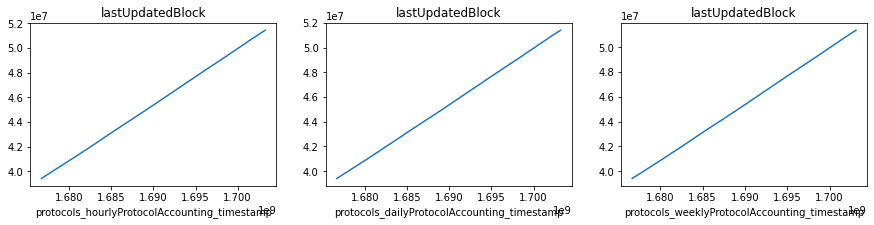

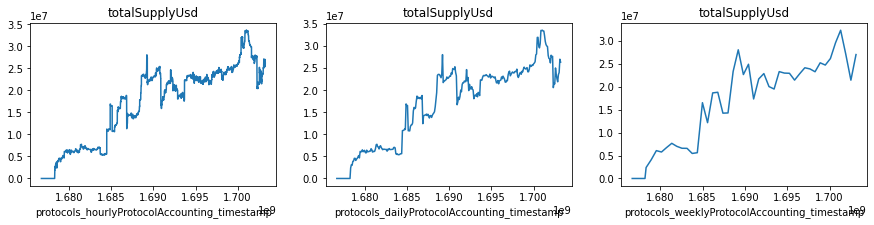

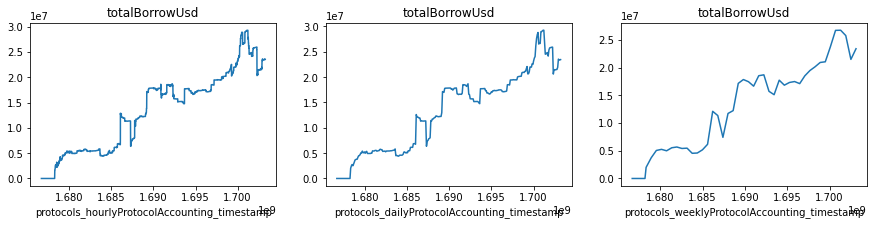

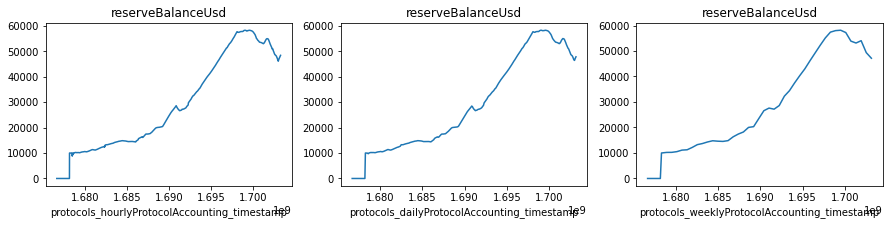

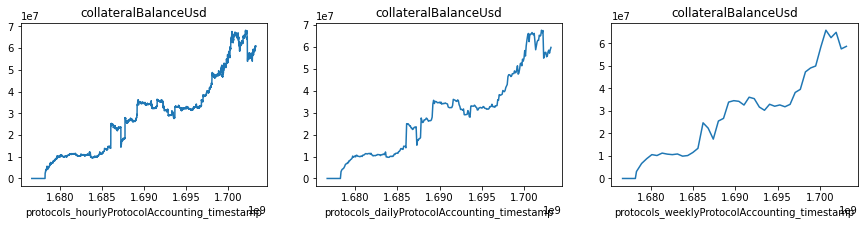

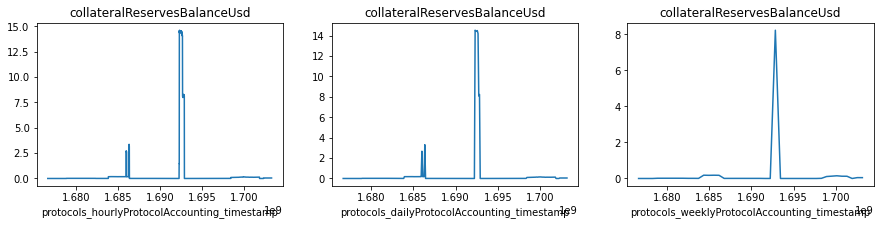

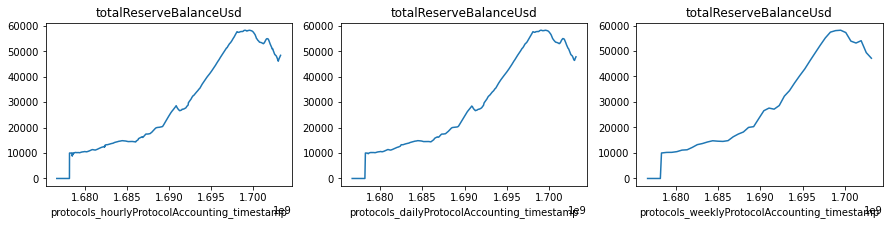

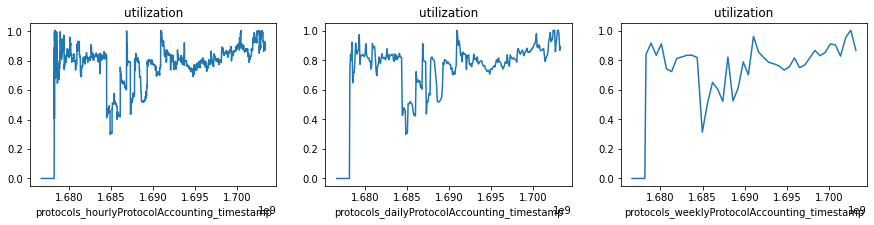

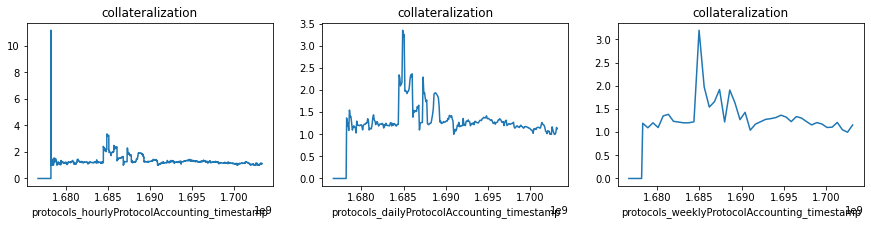

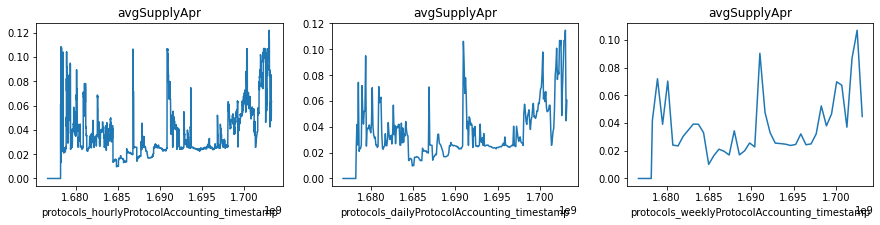

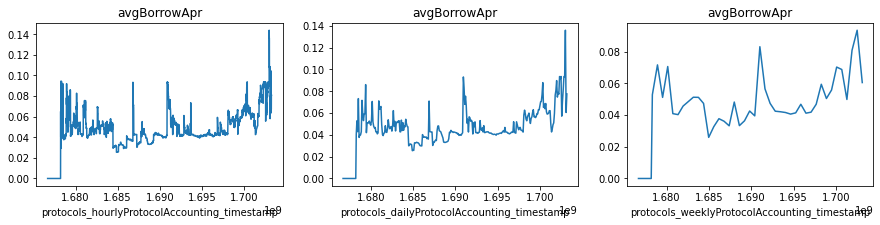

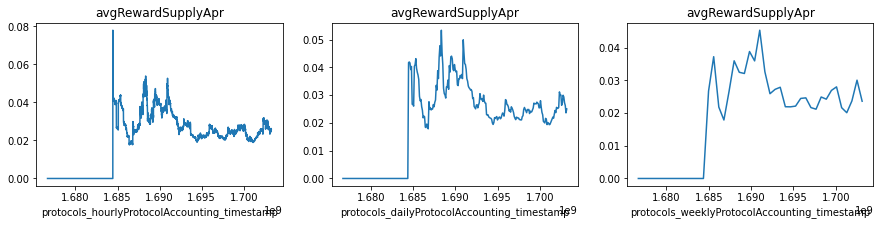

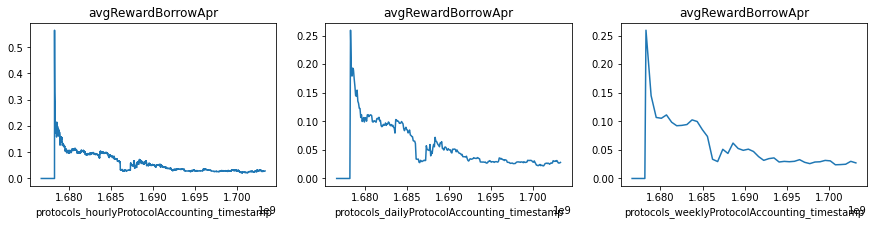

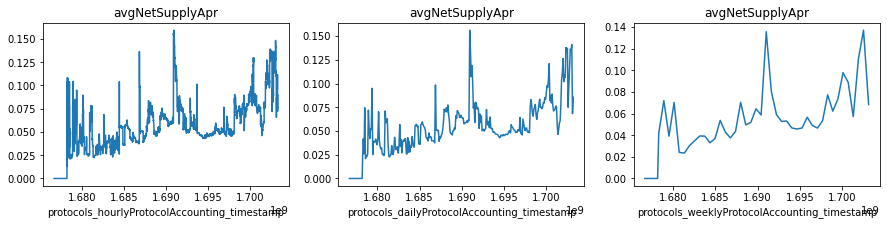

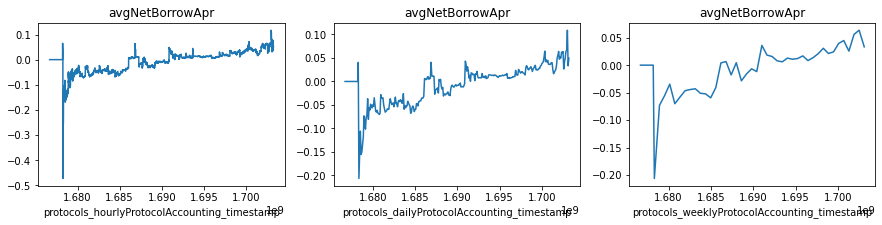

In [73]:
# Protocol Historical Accounting

hourly = comp_v3.Query.protocols.hourlyProtocolAccounting(orderBy="timestamp", first=100000000)
daily = comp_v3.Query.protocols.dailyProtocolAccounting(orderBy="timestamp", first=100000000)
weekly = comp_v3.Query.protocols.weeklyProtocolAccounting(orderBy="timestamp", first=100000000)

hourly_df = sg.query_df([hourly.timestamp, hourly.accounting], concat=True)
daily_df = sg.query_df([daily.timestamp, daily.accounting], concat=True)
weekly_df = sg.query_df([weekly.timestamp, weekly.accounting], concat=True)

plot_all([hourly_df, daily_df, weekly_df], ["protocols_hourlyProtocolAccounting_timestamp", "protocols_dailyProtocolAccounting_timestamp", "protocols_weeklyProtocolAccounting_timestamp"], "Protocol Accounting (hourly, daily, weekly)")


Protocol Usage (hourly, daily)


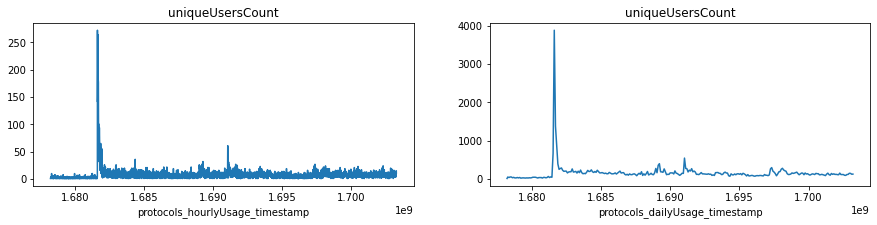

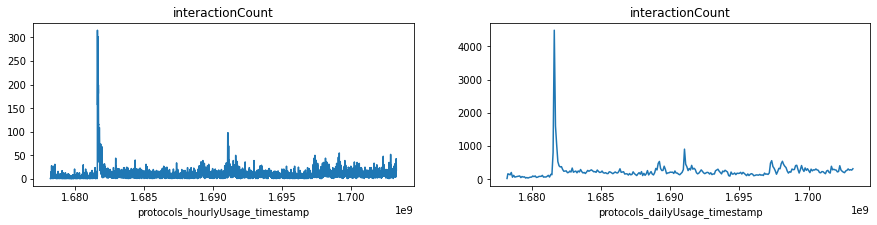

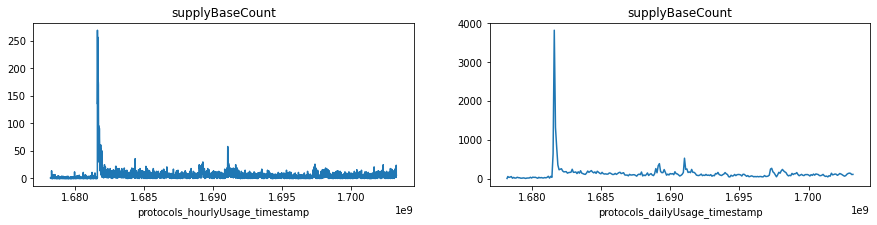

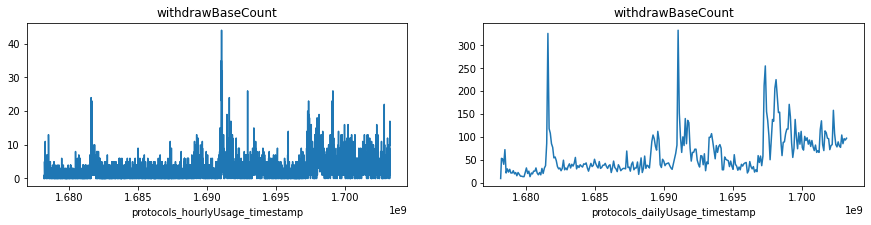

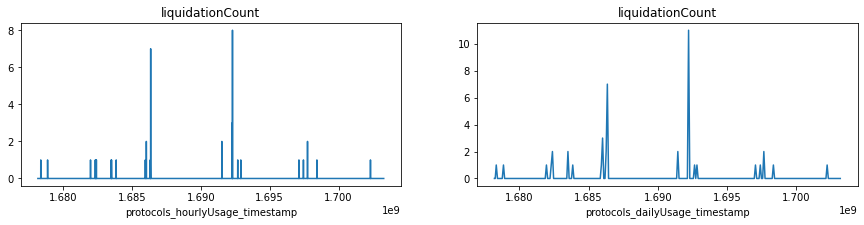

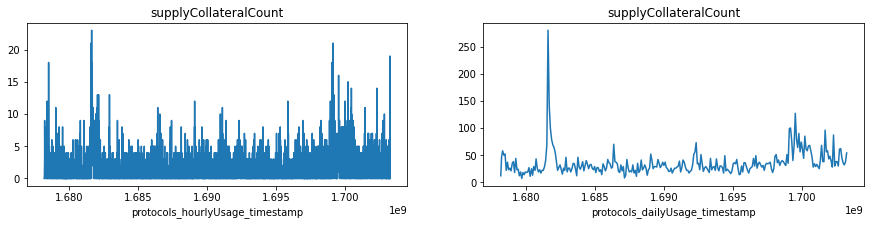

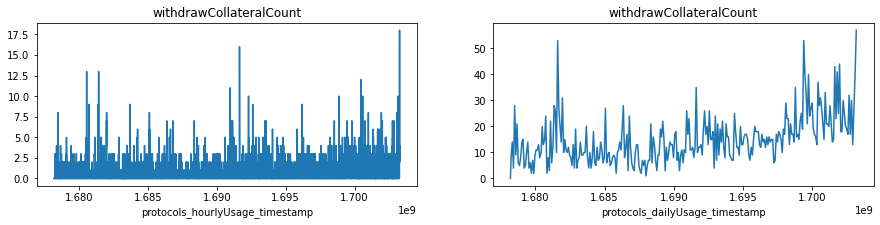

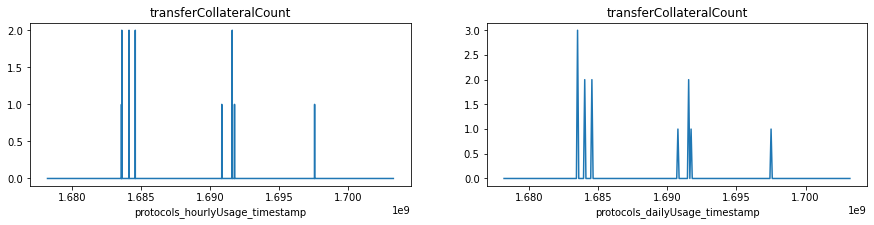

In [74]:
# Protocol historical usage

hourly = comp_v3.Query.protocols.hourlyUsage(orderBy="timestamp", first=100000000)
daily = comp_v3.Query.protocols.dailyUsage(orderBy="timestamp", first=100000000)

hourly_df = sg.query_df([hourly.timestamp, hourly.usage], concat=True)
daily_df = sg.query_df([daily.timestamp, daily.usage], concat=True)

# display(hourly_df)

plot_all([hourly_df, daily_df], ["protocols_hourlyUsage_timestamp", "protocols_dailyUsage_timestamp"], "Protocol Usage (hourly, daily)")


Compound USDC - Market Accounting (hourly, daily, weekly)


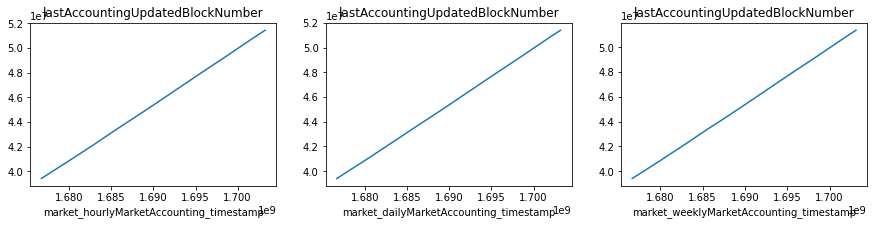

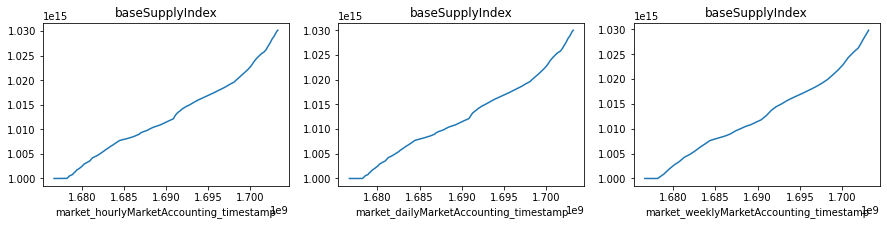

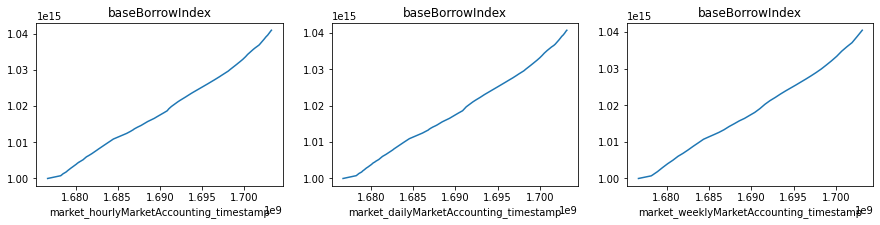

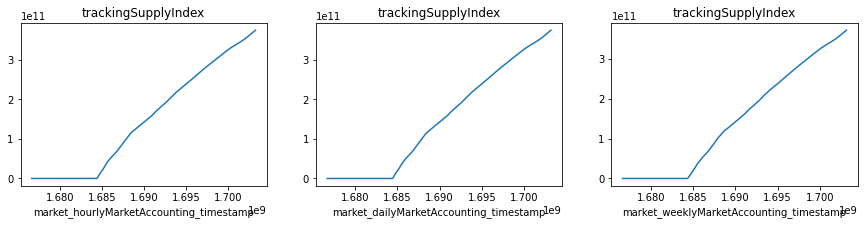

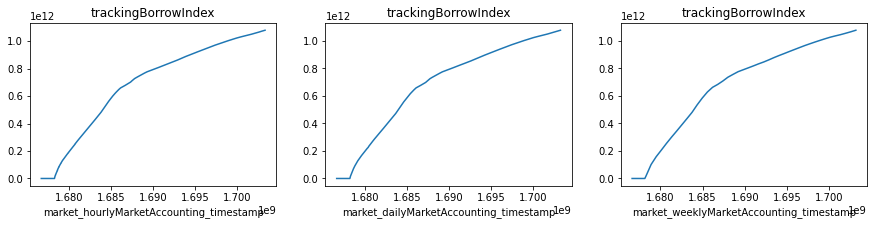

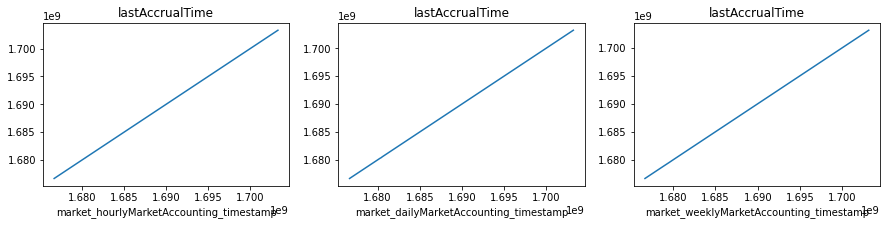

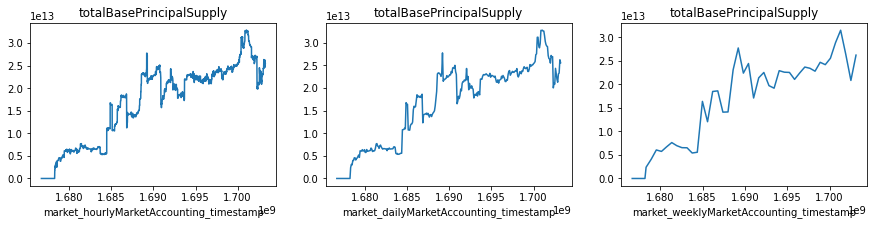

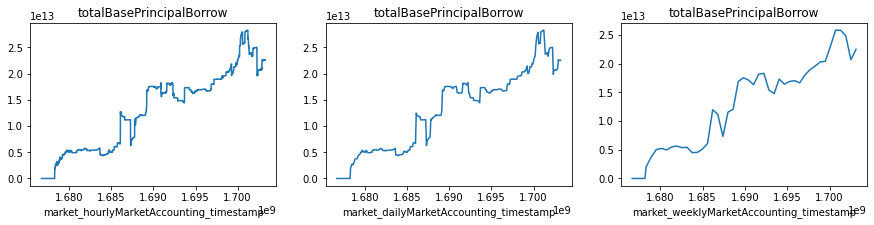

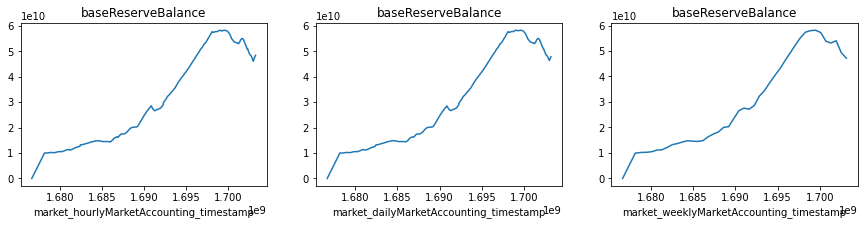

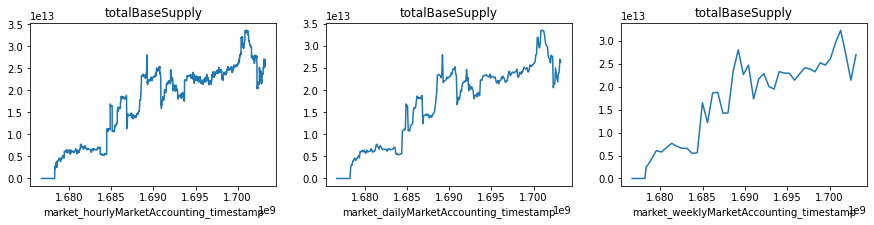

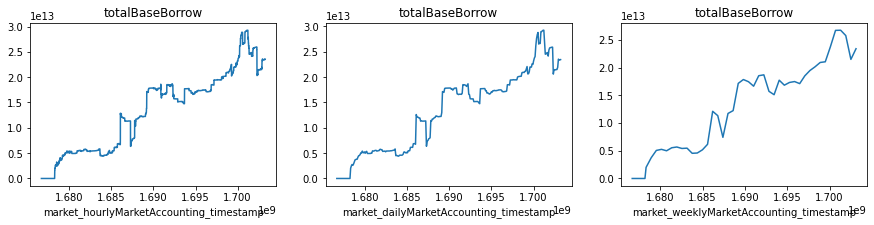

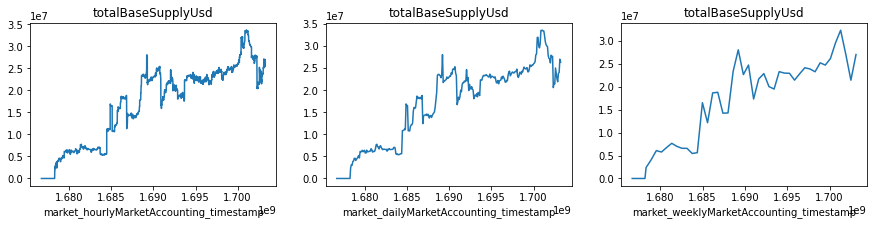

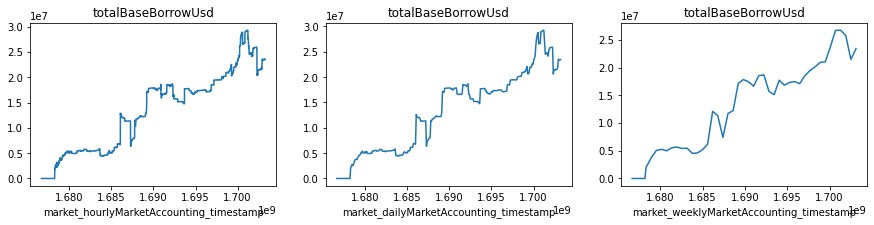

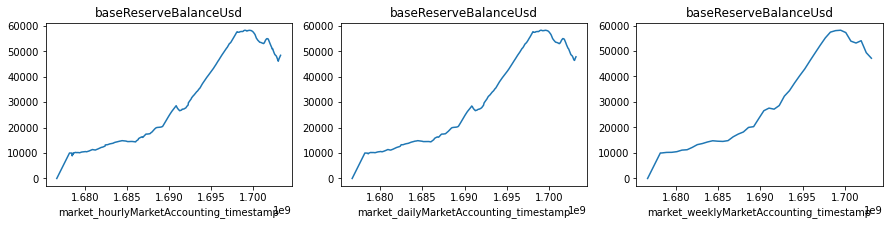

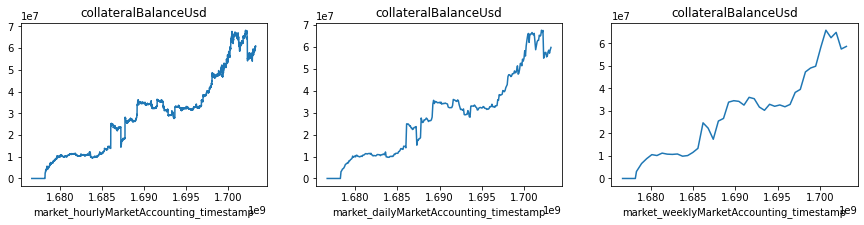

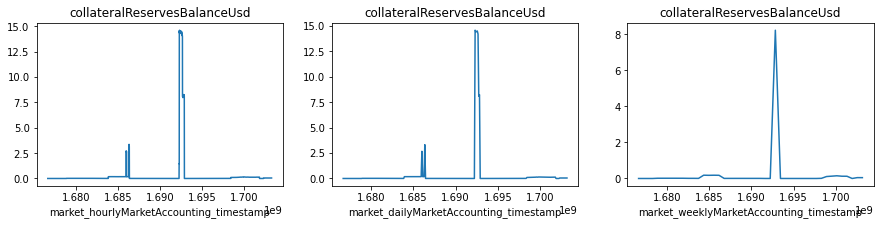

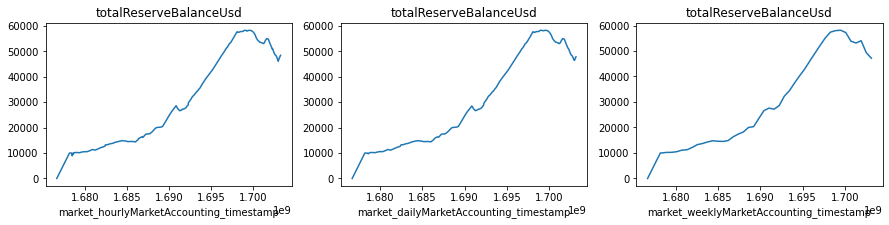

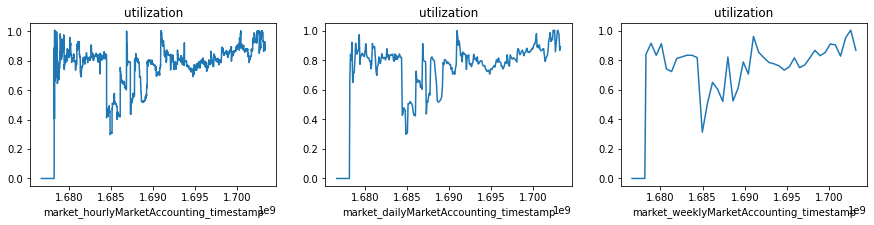

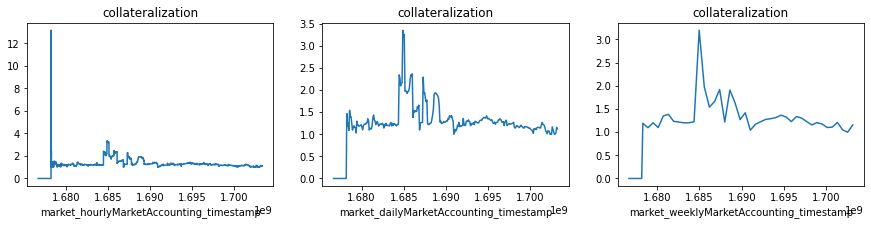

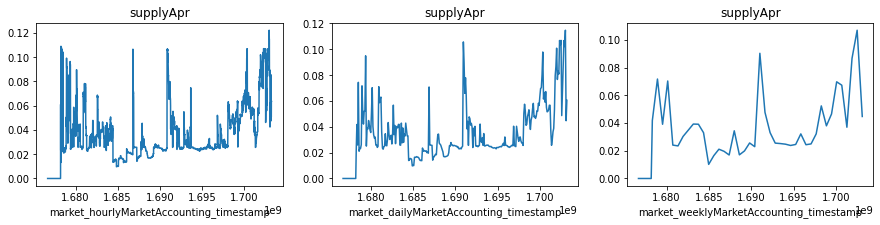

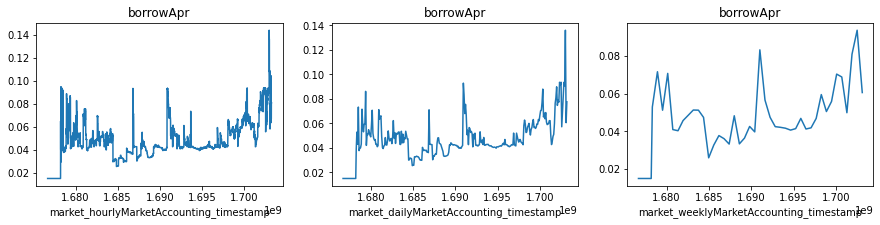

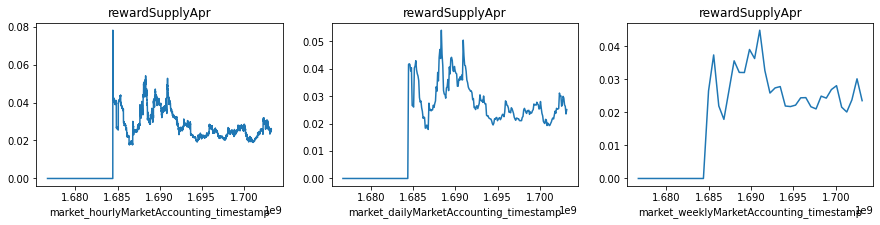

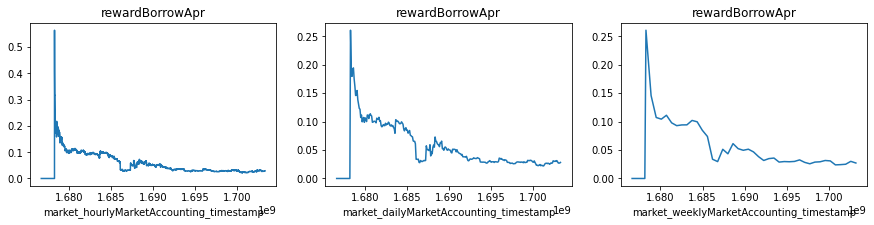

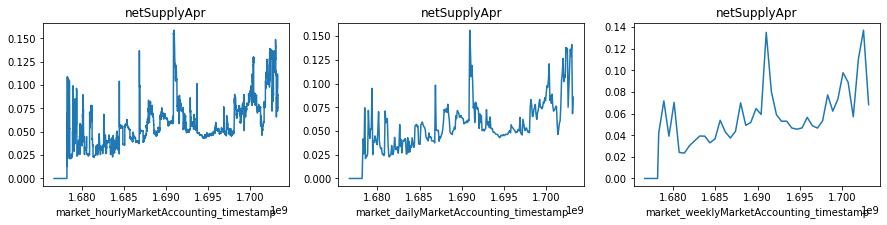

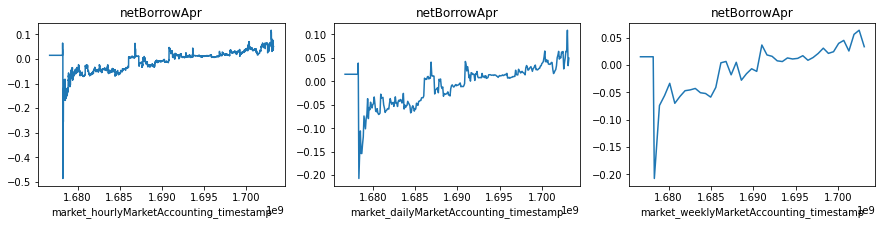

In [75]:
# Market Historical Accounting

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]

    market = comp_v3.Query.market(id=market_id)
    hourly = market.hourlyMarketAccounting(orderBy="timestamp", first=100000000)
    daily = market.dailyMarketAccounting(orderBy="timestamp", first=100000000)
    weekly = market.weeklyMarketAccounting(orderBy="timestamp", first=100000000)

    hourly_df = sg.query_df([hourly.timestamp, hourly.accounting], concat=True)
    daily_df = sg.query_df([daily.timestamp, daily.accounting], concat=True)
    weekly_df = sg.query_df([weekly.timestamp, weekly.accounting], concat=True)

    plot_all([hourly_df, daily_df, weekly_df], ["market_hourlyMarketAccounting_timestamp", "market_dailyMarketAccounting_timestamp", "market_weeklyMarketAccounting_timestamp"], f"{market_name} - Market Accounting (hourly, daily, weekly)")


Compound USDC - Market Configuration


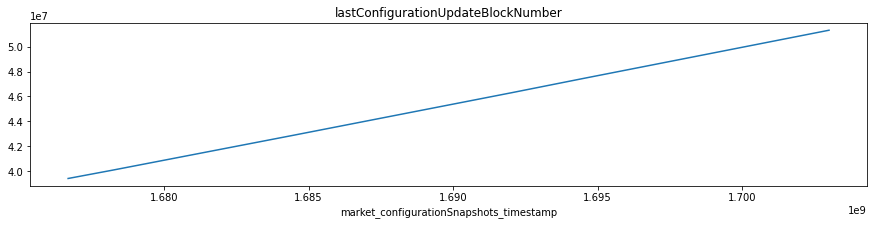

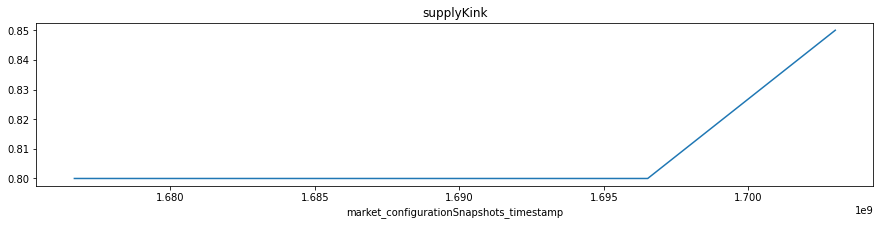

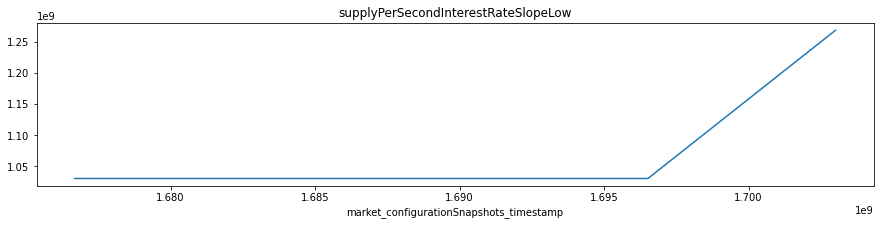

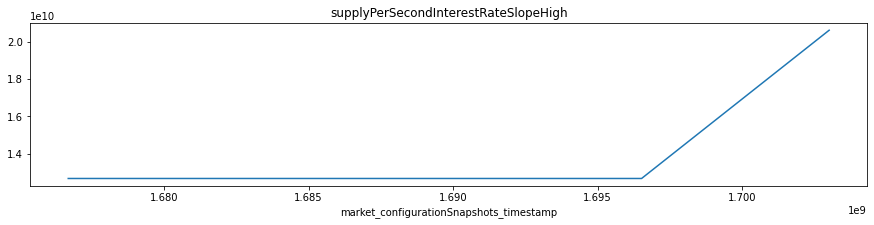

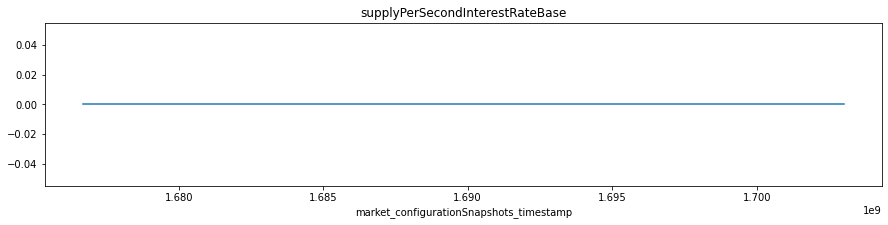

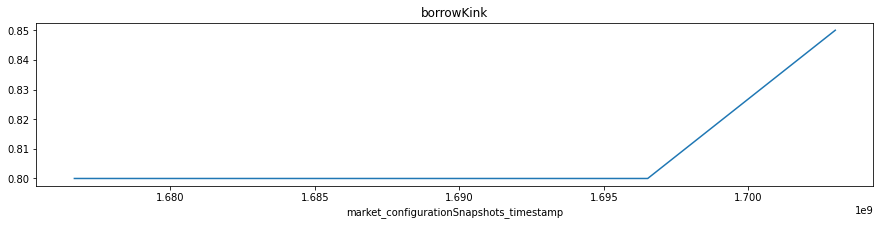

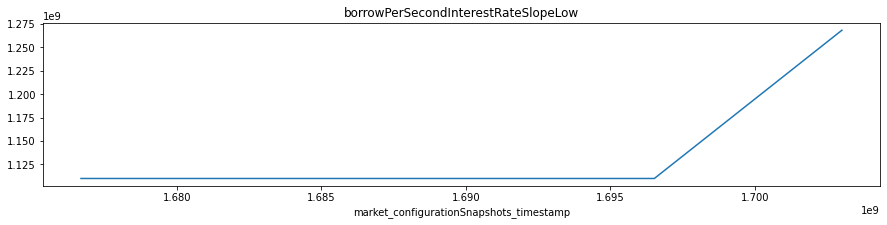

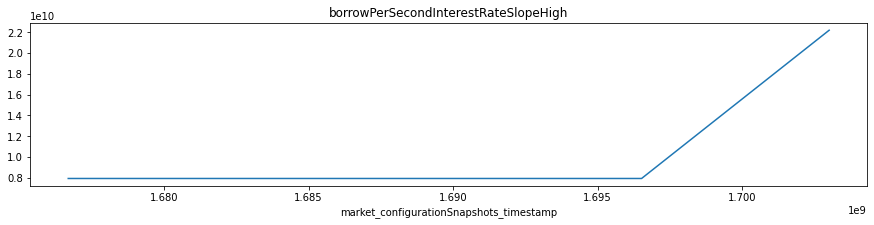

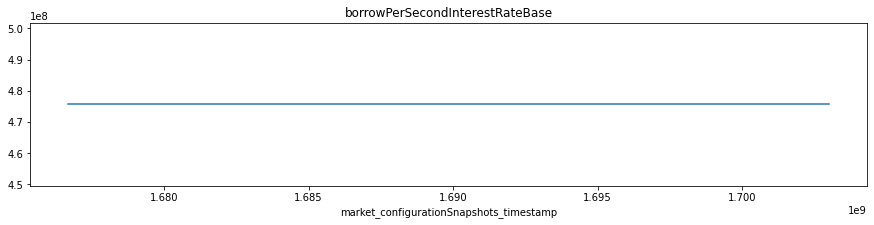

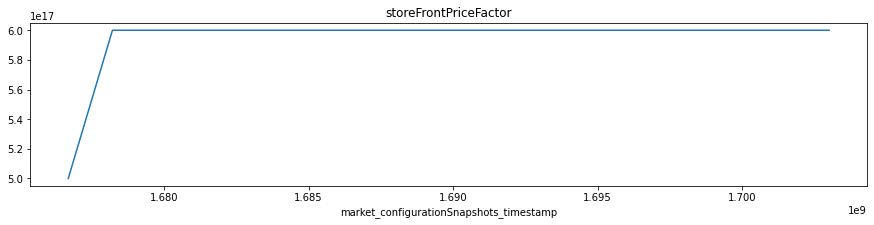

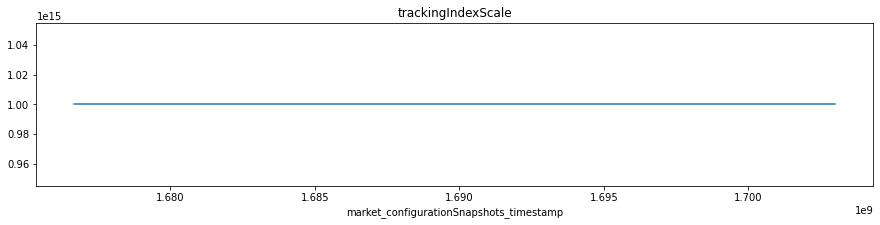

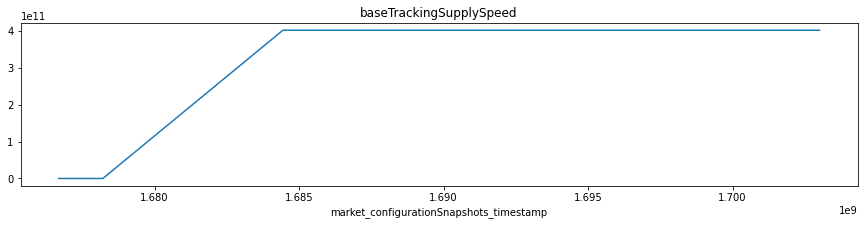

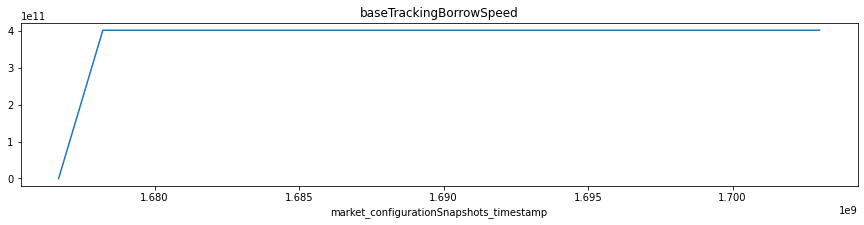

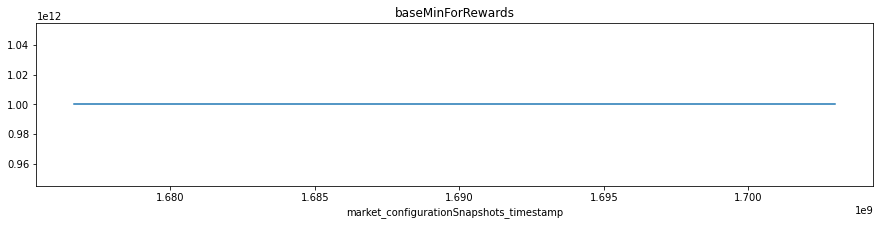

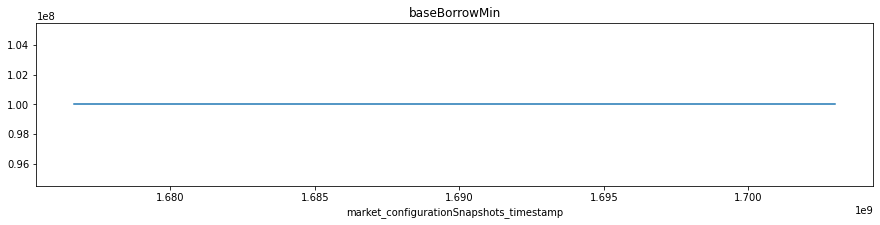

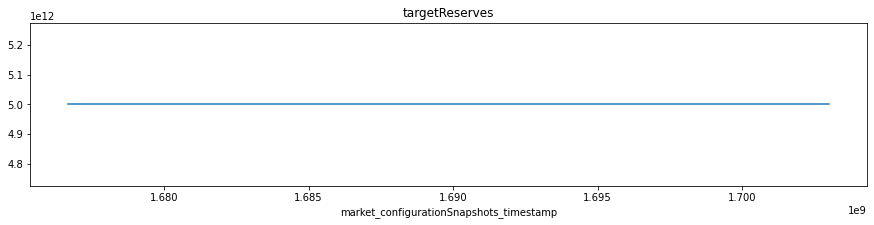

In [76]:
# Market Historical Configuration

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]

    market = comp_v3.Query.market(id=market_id)
    snapshots = market.configurationSnapshots(orderBy="timestamp", first=100000000)

    snapshots_df = sg.query_df([snapshots.timestamp, snapshots.configuration], concat=True)

    # display(snapshots_df)

    plot_all([snapshots_df], ["market_configurationSnapshots_timestamp"], f"{market_name} - Market Configuration") 


Compound USDC - Market Usage (hourly, daily)


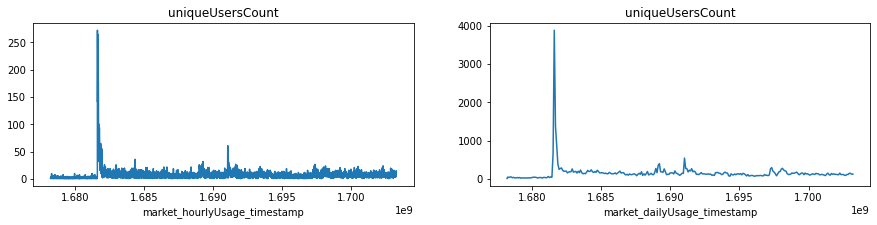

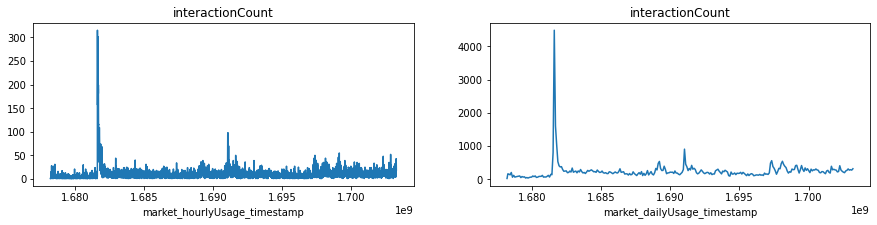

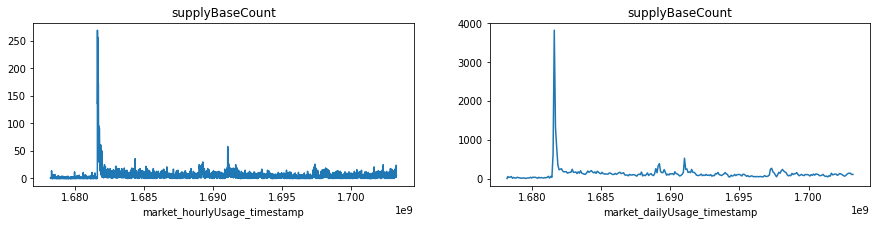

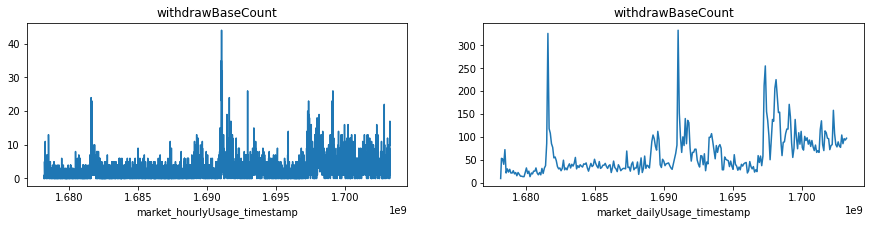

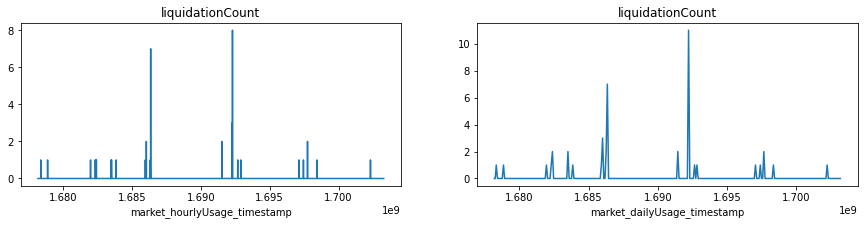

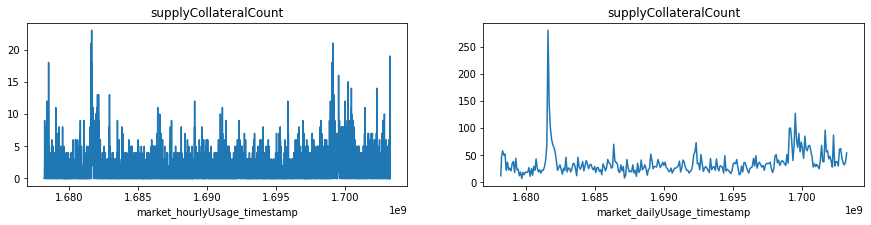

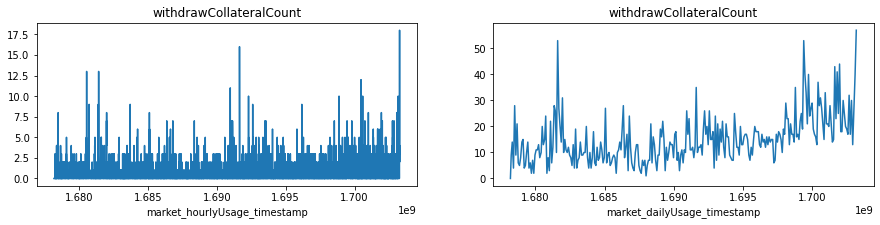

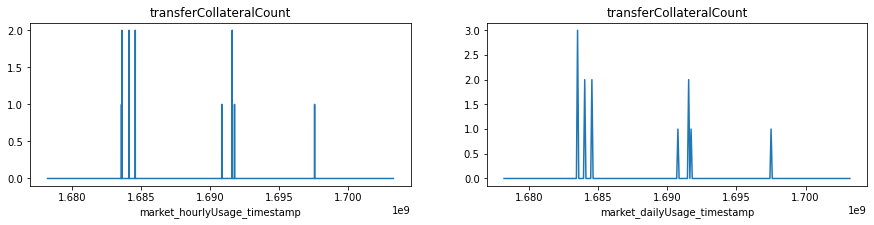

In [77]:
# Market Historical Usage

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]

    market = comp_v3.Query.market(id=market_id)
    hourly = market.hourlyUsage(orderBy="timestamp", first=100000000)
    daily = market.dailyUsage(orderBy="timestamp", first=100000000)

    hourly_df = sg.query_df([hourly.timestamp, hourly.usage], concat=True)
    daily_df = sg.query_df([daily.timestamp, daily.usage], concat=True)

    # display(hourly_df)

    plot_all([hourly_df, daily_df], ["market_hourlyUsage_timestamp", "market_dailyUsage_timestamp"], f"{market_name} - Market Usage (hourly, daily)")


,position_positionAccountingSnapshots_timestamp,position_positionAccountingSnapshots_accounting_id,position_positionAccountingSnapshots_accounting_lastUpdatedBlockNumber,position_positionAccountingSnapshots_accounting_position_id,position_positionAccountingSnapshots_accounting_basePrincipal,position_positionAccountingSnapshots_accounting_baseBalance,position_positionAccountingSnapshots_accounting_baseTrackingIndex,position_positionAccountingSnapshots_accounting_baseTrackingAccrued,position_positionAccountingSnapshots_accounting_baseBalanceUsd,position_positionAccountingSnapshots_accounting_collateralBalanceUsd
0,1695860907,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b449a69dd02540a,48064922,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0,0,0,0,0.000000e+00,33.944738
1,1695861029,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44d369dd02a100,48064979,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0,0,0,0,0.000000e+00,33.944738
2,1695863191,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b446b6ddd023502,48065899,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,0,0,0,0,0.000000e+00,0.000001
3,1700406388,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b442006fd026701,50136608,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,3721772687577,3809999897479,331626980960,0,3.810012e+06,0.000000
4,1700406586,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b447e06fd02e000,50136702,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,2930528988728,3000000297880,331629522847,9460,2.999940e+06,0.000000
5,1700519707,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44bad3fd02ea00,50189242,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,2930736031826,3000901765137,333088123074,4283929,3.000988e+06,0.000000
6,1700676857,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b4408eefe02bb00,50261512,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,2928783406722,2999838492946,335182797699,10422867,2.999838e+06,0.000000
7,1700761597,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b440088ff025b02,50300928,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,3709964424477,3800639998728,336359361767,13868767,3.800653e+06,0.000000
8,1700857674,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44aa3700037e01,50345898,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,3710198940308,3801503829380,337643550046,18633059,3.801879e+06,0.000000
9,1700995368,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44d02e01032a02,50409168,0xf25212e676d1f7f89cd72ffee66158f54124644575e42d184b2f4b1fea2673a9f3116d1f66c90b44,3710522934824,3802702934378,339344576742,24944205,3.802239e+06,0.000000


0x75e42d184b2f4b1fea2673a9f3116d1f66c90b44 - Position Accounting


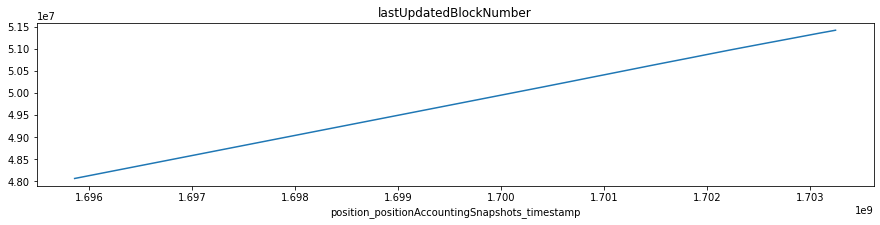

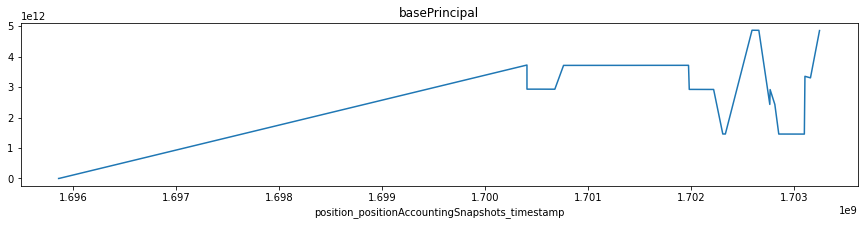

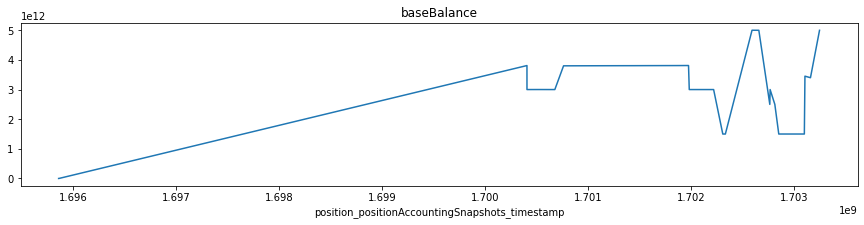

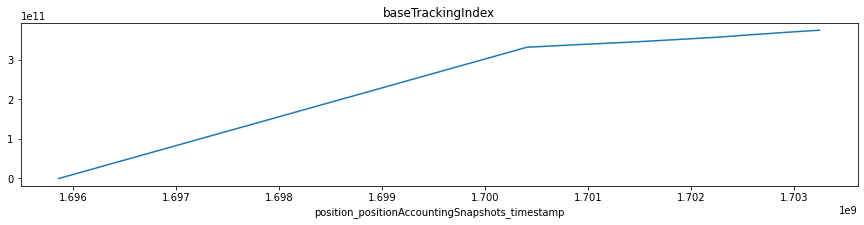

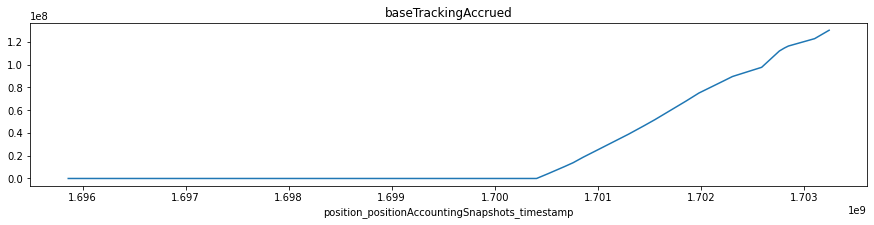

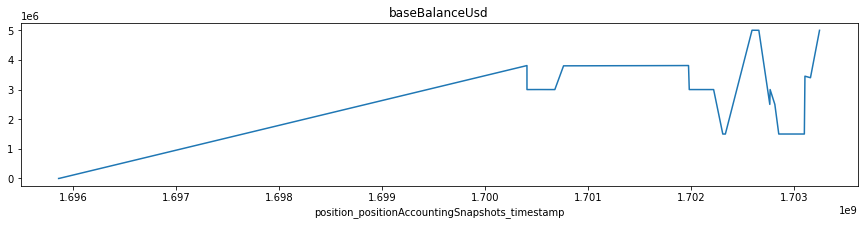

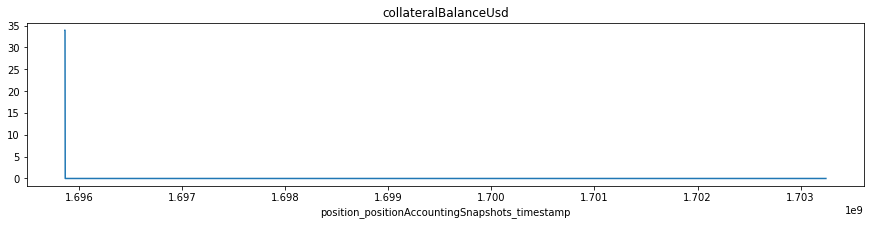

,position_positionAccountingSnapshots_timestamp,position_positionAccountingSnapshots_accounting_id,position_positionAccountingSnapshots_accounting_lastUpdatedBlockNumber,position_positionAccountingSnapshots_accounting_position_id,position_positionAccountingSnapshots_accounting_basePrincipal,position_positionAccountingSnapshots_accounting_baseBalance,position_positionAccountingSnapshots_accounting_baseTrackingIndex,position_positionAccountingSnapshots_accounting_baseTrackingAccrued,position_positionAccountingSnapshots_accounting_baseBalanceUsd,position_positionAccountingSnapshots_accounting_collateralBalanceUsd
0,1702417464,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaaca1c0b03cc01,51059914,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaa,291893160220,299999812772,360018155129,0,3.000550e+05,0.0
1,1702418578,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaab81e0b03be02,51060408,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaa,583785222305,599999040917,360039940898,6359,6.001182e+05,0.0
2,1702419307,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaa0d200b03df01,51060749,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaa,875676568460,900000937017,360053998586,14565,9.001899e+05,0.0
3,1702720628,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaae3220d032b01,51192547,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaa,486810977269,500749285074,365579047489,4852720,5.008474e+05,0.0
4,1702721384,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaa25240d030501,51192869,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaa,1040944623184,1070750749721,365592325965,4859184,1.071212e+06,0.0
5,1702769963,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaad9770d038e00,51214297,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaa,1332562520713,1370864634964,366434474068,5735813,1.371166e+06,0.0
6,1702855288,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaa64090e031101,51251556,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaa,1526991994545,1571264402936,368007924497,7832534,1.571373e+06,0.0
7,1702855905,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaa710a0e03ba01,51251825,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaa,1733989934863,1784267867375,368019702223,7850518,1.784378e+06,0.0
8,1702892023,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaa22450e030701,51266850,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaa,2238305969597,2303477784779,368695421931,9022209,2.303648e+06,0.0
9,1702892805,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaa74460e03d700,51267188,0xf25212e676d1f7f89cd72ffee66158f541246445df2609ec3d2e07a79d2e25e52960e75250bd9aaa,2757037559878,2837316803153,368709675105,9054111,2.837524e+06,0.0


0xdf2609ec3d2e07a79d2e25e52960e75250bd9aaa - Position Accounting


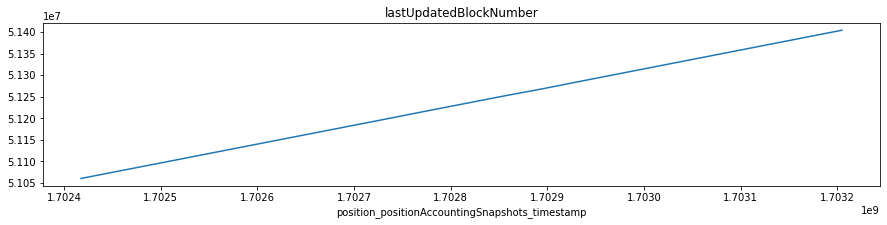

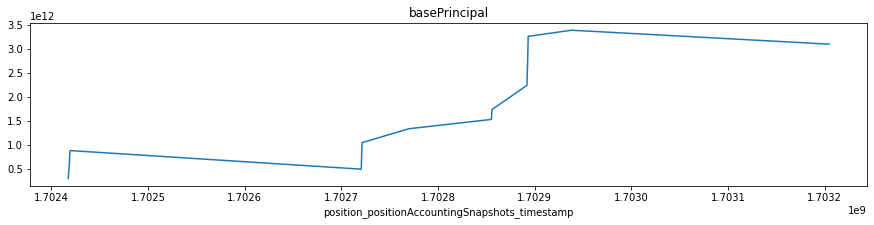

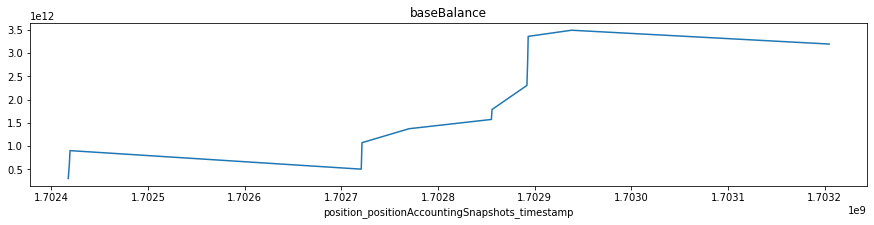

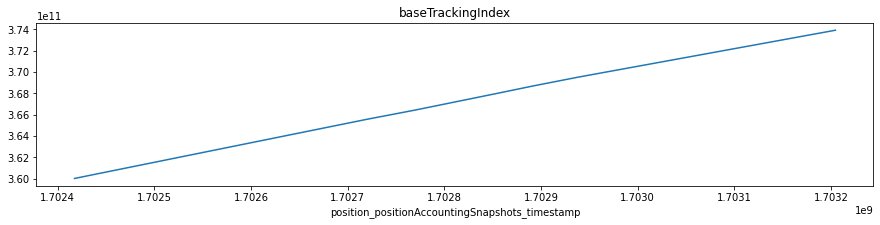

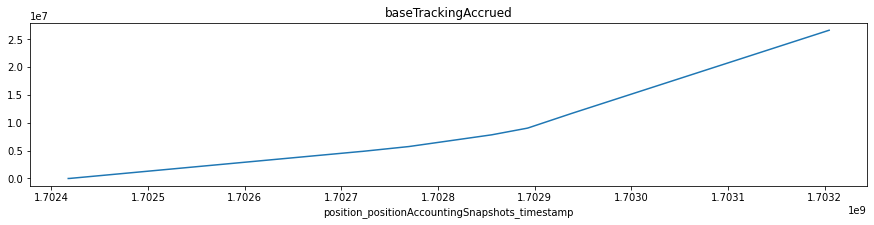

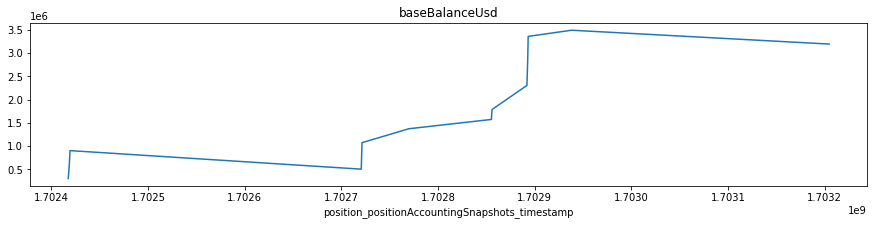

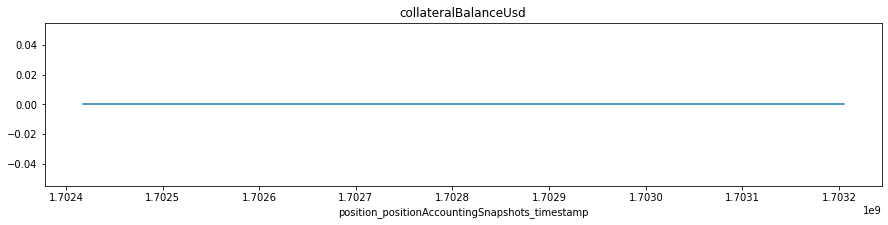

,position_positionAccountingSnapshots_timestamp,position_positionAccountingSnapshots_accounting_id,position_positionAccountingSnapshots_accounting_lastUpdatedBlockNumber,position_positionAccountingSnapshots_accounting_position_id,position_positionAccountingSnapshots_accounting_basePrincipal,position_positionAccountingSnapshots_accounting_baseBalance,position_positionAccountingSnapshots_accounting_baseTrackingIndex,position_positionAccountingSnapshots_accounting_baseTrackingAccrued,position_positionAccountingSnapshots_accounting_baseBalanceUsd,position_positionAccountingSnapshots_accounting_collateralBalanceUsd
0,1687446216,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e869497a202ab02,44210068,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e86,420283470179,424319563268,86993491037,0,4.243490e+05,0.0
1,1688064751,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e8647d2a6029b00,44487239,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e86,459883298692,464518545030,104720294387,7450282,4.645055e+05,0.0
2,1688656696,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e86d7ebaa020701,44755927,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e86,469779175273,474721983181,118730835233,13893495,4.746977e+05,0.0
3,1689256352,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e86ab1eaf02f001,45031083,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e86,519881245627,525527230130,128976868511,18706868,5.255673e+05,0.0
4,1690228040,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e86b0e0b502b701,45473968,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e86,1106480947951,1119381562713,146420366752,27775415,1.119382e+06,0.0
5,1690918030,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e8621b8ba023801,45791265,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e86,1086724031355,1100093451502,158255475372,40870737,1.100104e+06,0.0
6,1690918782,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e8674b9ba02b900,45791604,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e86,1066967164744,1080094821098,158273812872,40890664,1.080305e+06,0.0
7,1691072396,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e8688ccbb028000,45862024,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e86,1106462692071,1120595174691,161943749598,44806365,1.120594e+06,0.0
8,1691523541,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e8645f6be022701,46069317,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e86,1937993543002,1964337653007,171610948084,55502759,1.964534e+06,0.0
9,1697118806,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e86fa0de6027a,48631290,0xf25212e676d1f7f89cd72ffee66158f541246445e6e45ed4e14c0409a8e6b7deaf1d8177d2e12e86,2183407948180,2224185218191,276985016224,259717022,2.224174e+06,0.0


0xe6e45ed4e14c0409a8e6b7deaf1d8177d2e12e86 - Position Accounting


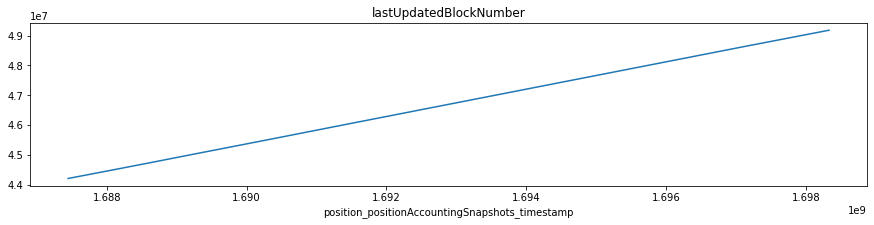

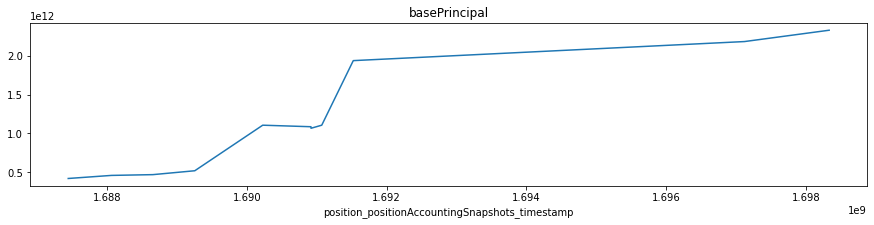

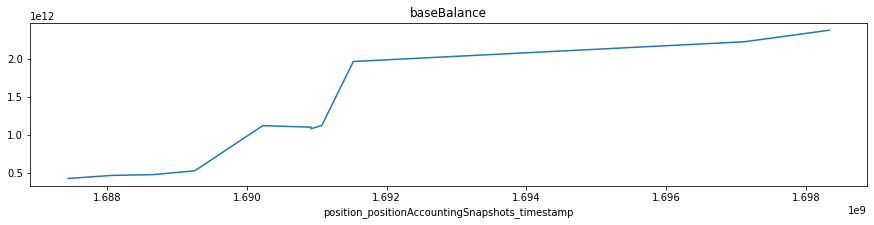

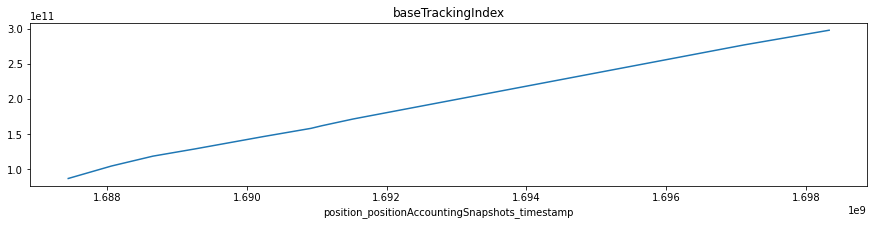

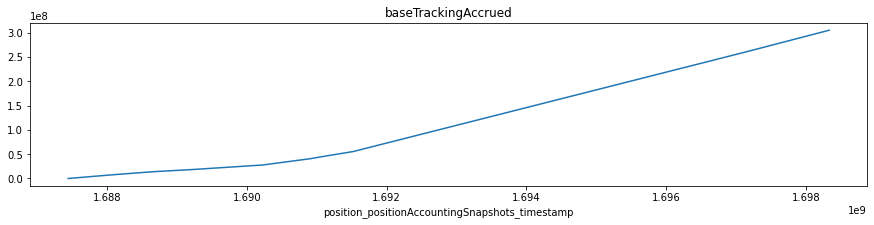

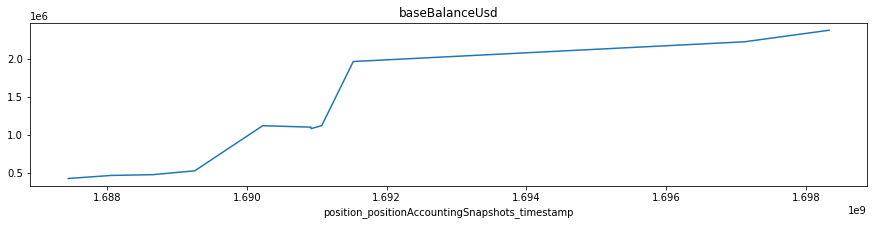

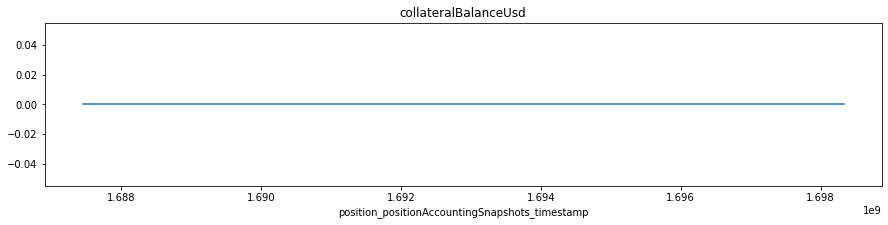

In [78]:
# Position Accounting 

positions = comp_v3.Query.positions(first=3, orderBy=comp_v3.Position.accounting.baseBalance, orderDirection="desc")
positions_df = sg.query_df([positions.id, positions.account.address])

# display(positions_df)

for index, row in positions_df.iterrows():
    position_address = row["positions_account_address"]
    position_id = row["positions_id"]

    snapshots = comp_v3.Query.position(id=position_id).positionAccountingSnapshots(orderBy="timestamp", first=10000)

    snapshots_df = sg.query_df([snapshots.timestamp, snapshots.accounting], concat=True)

    display(snapshots_df)

    plot_all([snapshots_df], ["position_positionAccountingSnapshots_timestamp"], f"{position_address} - Position Accounting") 
